# **Contents**
[Importing Libraries and Packages](#p2)  
[Loading and Viewing Data Set](#p3)  
[Split data between _Prospect versus _Existing Customer](#p4)  
[Create New Customer(prospect) Model](#p5)  
[Create Recency Variables by Propsect](done in etl_pipeline_sources.ipynb)
[Dealing with NaN Values (Imputation)](#p7)  
[Categorical Feature Engineering](#p8)  
[Numerical Feature Engineering](#p9)  
[Predicting Win Loss Models](#p10)  
[Evaluating Model Performances](#p11)  
[Creating Production Scripting](#p12)  
[**Placeholder for confusion matrix and feature weights for models**](#p13)
<a id="p1"></a>

#  **Importing Libraries and Packages**

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns

from matplotlib import pyplot as plt
import missingno as msno  #missing data
from dtreeviz.trees import *  #decision tree visualization
from IPython.display import Image, display_svg
sns.set_style("whitegrid")
%matplotlib inline

from dtreeviz.trees import *
from IPython.display import Image, display_svg

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

import os 
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")
#print(os.listdir("../input"))

#  **Loading and Viewing Data Set**
<a id="p3"></a>

In [2]:
# Print options
np.set_printoptions(precision=4, threshold=10000, linewidth=160, edgeitems=999, suppress=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 160)
pd.set_option('expand_frame_repr', False)
pd.set_option('precision', 4)
""" fix flow to 3 places"""
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
datadirectory = '/Users/user1/projects/datascience/notebooks/cvanalytics/pipeline_scoring/'

In [4]:
data = pd.read_pickle(datadirectory+'data_existing')
data.head()

,wonopp,opp_id,accountid,opp_createddate,inflowdate__c,closedate,firstwindate,daysfromcreate,stagename,software_amount__c,hasmtnrenewal,acquisitiontype__c,lastupdate,lastforecastcategory,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,numberofemployees,annualrevenue,start_date_at_commvault__c,is_firstwindate,no_firstwindate,cust_model,PrevClose365WonAmount,PrevClose365LostAmount,cum_prev_close_lost,cum_prev_close_won,dayfrominflow,days_fr_hire
0,0,0061W00000oga5sQAA,0014000000FFOT8AAP,2017-09-26 14:00:18,2017-09-26,2018-02-22,2013-06-13,149,Closed / Lost,"9,000.00",0,Perpetual,2018-02-08 13:36:09.0000000,Pipeline,Qualifying,End User - Customer,Americas,Canada,Manufacturing,200.00,"11,667,786.00",2011-11-07,0,0,0,0.00,"4,500.00",3.00,0.00,149.00,"2,299.00"
1,1,0061W00000oggimQAA,0014000000FFPo9AAH,2017-09-27 10:58:02,2017-09-27,2017-11-30,2003-06-20,64,Closed/Won,"1,528.66",0,Perpetual,2017-11-30 15:07:14.0000000,BestCase,Selection,End User - Customer,Americas,Canada,Transportation,"1,900.00","450,000,000.00",2011-11-07,0,0,0,0.00,0.00,1.00,0.00,64.00,"2,215.00"
2,1,0061W00000ogaVvQAI,0014000000TBI7lAAH,2017-09-26 14:42:44,2017-09-26,2017-10-05,2011-04-21,9,Closed/Won,"11,063.79",0,Perpetual,2017-10-05 13:36:04.0000000,BestCase,Selection,End User - Customer,Americas,US West & LATAM,Banking & Insurance,"1,200.00",0.00,2015-06-22,0,0,0,"11,063.79",nan,0.00,2.00,9.00,836.00
3,1,0061W00000ogbwNQAQ,0014000000ZuWjIAAV,2017-09-26 17:12:34,2017-09-26,2017-10-18,2012-05-09,22,Closed/Won,"17,604.15",0,Perpetual,2017-10-18 11:33:54.0000000,BestCase,Selection,End User - Customer,Americas,US West & LATAM,Healthcare,"1,600.00","369,025,810.00",2010-10-04,0,0,0,"62,804.00",nan,1.00,3.00,22.00,"2,571.00"
4,1,0061W00000ogh7SQAQ,0014000000Ov8NrAAJ,2017-09-27 11:37:16,2017-09-27,2018-06-29,2018-03-30,275,Closed/Won,"11,347.16",0,Perpetual,2018-05-11 04:02:00.0000000,BestCase,Selection,End User - Customer,EMEA,Global Enterprise,Other,"84,316.00","12,690,000,000.00",2009-07-06,0,0,0,"3,654.94",nan,0.00,1.00,275.00,"3,280.00"


In [5]:
data['DateLink'] = data['opp_createddate'] - pd.to_timedelta(60, unit='d')
data['DateLink'] = data['DateLink'].values.astype('datetime64[M]')

In [6]:
data.head()

,wonopp,opp_id,accountid,opp_createddate,inflowdate__c,closedate,firstwindate,daysfromcreate,stagename,software_amount__c,hasmtnrenewal,acquisitiontype__c,lastupdate,lastforecastcategory,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,numberofemployees,annualrevenue,start_date_at_commvault__c,is_firstwindate,no_firstwindate,cust_model,PrevClose365WonAmount,PrevClose365LostAmount,cum_prev_close_lost,cum_prev_close_won,dayfrominflow,days_fr_hire,DateLink
0,0,0061W00000oga5sQAA,0014000000FFOT8AAP,2017-09-26 14:00:18,2017-09-26,2018-02-22,2013-06-13,149,Closed / Lost,"9,000.00",0,Perpetual,2018-02-08 13:36:09.0000000,Pipeline,Qualifying,End User - Customer,Americas,Canada,Manufacturing,200.00,"11,667,786.00",2011-11-07,0,0,0,0.00,"4,500.00",3.00,0.00,149.00,"2,299.00",2017-07-01
1,1,0061W00000oggimQAA,0014000000FFPo9AAH,2017-09-27 10:58:02,2017-09-27,2017-11-30,2003-06-20,64,Closed/Won,"1,528.66",0,Perpetual,2017-11-30 15:07:14.0000000,BestCase,Selection,End User - Customer,Americas,Canada,Transportation,"1,900.00","450,000,000.00",2011-11-07,0,0,0,0.00,0.00,1.00,0.00,64.00,"2,215.00",2017-07-01
2,1,0061W00000ogaVvQAI,0014000000TBI7lAAH,2017-09-26 14:42:44,2017-09-26,2017-10-05,2011-04-21,9,Closed/Won,"11,063.79",0,Perpetual,2017-10-05 13:36:04.0000000,BestCase,Selection,End User - Customer,Americas,US West & LATAM,Banking & Insurance,"1,200.00",0.00,2015-06-22,0,0,0,"11,063.79",nan,0.00,2.00,9.00,836.00,2017-07-01
3,1,0061W00000ogbwNQAQ,0014000000ZuWjIAAV,2017-09-26 17:12:34,2017-09-26,2017-10-18,2012-05-09,22,Closed/Won,"17,604.15",0,Perpetual,2017-10-18 11:33:54.0000000,BestCase,Selection,End User - Customer,Americas,US West & LATAM,Healthcare,"1,600.00","369,025,810.00",2010-10-04,0,0,0,"62,804.00",nan,1.00,3.00,22.00,"2,571.00",2017-07-01
4,1,0061W00000ogh7SQAQ,0014000000Ov8NrAAJ,2017-09-27 11:37:16,2017-09-27,2018-06-29,2018-03-30,275,Closed/Won,"11,347.16",0,Perpetual,2018-05-11 04:02:00.0000000,BestCase,Selection,End User - Customer,EMEA,Global Enterprise,Other,"84,316.00","12,690,000,000.00",2009-07-06,0,0,0,"3,654.94",nan,0.00,1.00,275.00,"3,280.00",2017-07-01


In [7]:
data = data.set_index(['DateLink'])

In [8]:
data = data.to_period(freq='M')

In [9]:
data.reset_index(inplace=True)
data = data.set_index(['accountid','DateLink'])
data.head()

,,wonopp,opp_id,opp_createddate,inflowdate__c,closedate,firstwindate,daysfromcreate,stagename,software_amount__c,hasmtnrenewal,acquisitiontype__c,lastupdate,lastforecastcategory,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,numberofemployees,annualrevenue,start_date_at_commvault__c,is_firstwindate,no_firstwindate,cust_model,PrevClose365WonAmount,PrevClose365LostAmount,cum_prev_close_lost,cum_prev_close_won,dayfrominflow,days_fr_hire
accountid,DateLink,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0014000000FFOT8AAP,2017-07,0,0061W00000oga5sQAA,2017-09-26 14:00:18,2017-09-26,2018-02-22,2013-06-13,149,Closed / Lost,"9,000.00",0,Perpetual,2018-02-08 13:36:09.0000000,Pipeline,Qualifying,End User - Customer,Americas,Canada,Manufacturing,200.00,"11,667,786.00",2011-11-07,0,0,0,0.00,"4,500.00",3.00,0.00,149.00,"2,299.00"
0014000000FFPo9AAH,2017-07,1,0061W00000oggimQAA,2017-09-27 10:58:02,2017-09-27,2017-11-30,2003-06-20,64,Closed/Won,"1,528.66",0,Perpetual,2017-11-30 15:07:14.0000000,BestCase,Selection,End User - Customer,Americas,Canada,Transportation,"1,900.00","450,000,000.00",2011-11-07,0,0,0,0.00,0.00,1.00,0.00,64.00,"2,215.00"
0014000000TBI7lAAH,2017-07,1,0061W00000ogaVvQAI,2017-09-26 14:42:44,2017-09-26,2017-10-05,2011-04-21,9,Closed/Won,"11,063.79",0,Perpetual,2017-10-05 13:36:04.0000000,BestCase,Selection,End User - Customer,Americas,US West & LATAM,Banking & Insurance,"1,200.00",0.00,2015-06-22,0,0,0,"11,063.79",nan,0.00,2.00,9.00,836.00
0014000000ZuWjIAAV,2017-07,1,0061W00000ogbwNQAQ,2017-09-26 17:12:34,2017-09-26,2017-10-18,2012-05-09,22,Closed/Won,"17,604.15",0,Perpetual,2017-10-18 11:33:54.0000000,BestCase,Selection,End User - Customer,Americas,US West & LATAM,Healthcare,"1,600.00","369,025,810.00",2010-10-04,0,0,0,"62,804.00",nan,1.00,3.00,22.00,"2,571.00"
0014000000Ov8NrAAJ,2017-07,1,0061W00000ogh7SQAQ,2017-09-27 11:37:16,2017-09-27,2018-06-29,2018-03-30,275,Closed/Won,"11,347.16",0,Perpetual,2018-05-11 04:02:00.0000000,BestCase,Selection,End User - Customer,EMEA,Global Enterprise,Other,"84,316.00","12,690,000,000.00",2009-07-06,0,0,0,"3,654.94",nan,0.00,1.00,275.00,"3,280.00"


In [10]:
usage = pd.read_pickle(datadirectory+'usageStats')
#usage.reset_index(inplace=True)
usage.head()

buGroEst  diskGroEst  vmGroEst
accountid          usageDateLink                                
0011W00001qosMLQAY 2012-08             nan         nan       nan
                   2012-09             nan         nan       nan
                   2012-10             nan         nan       nan
                   2012-11             nan         nan       nan
                   2012-12             nan         nan       nan

In [11]:
usage.index.names = ['accountid', 'DateLink']

In [12]:
data = data.join(usage, how='left')

In [13]:
data.head()

wonopp              opp_id     opp_createddate inflowdate__c  closedate firstwindate  daysfromcreate      stagename  software_amount__c  hasmtnrenewal acquisitiontype__c                   lastupdate lastforecastcategory laststagename relationshiptype_text__c reportinglevel0__c reportinglevel1__c            industry  numberofemployees  annualrevenue start_date_at_commvault__c  is_firstwindate  no_firstwindate  cust_model  PrevClose365WonAmount  PrevClose365LostAmount  cum_prev_close_lost  cum_prev_close_won  dayfrominflow  days_fr_hire  buGroEst  diskGroEst  vmGroEst
accountid          DateLink                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
0011W00001qotBKQAY 2017-07        0  0061W00000rQUJVQA4 2017-09-18 09:08:39    2017-09-20 2017-11-17   2018-04-16              60  Closed / Lost           20,000.00              0          Perpetual  2017-10-26 11:03:50.0000000             Pipeline   Positioning      End User - Customer               EMEA        East Europe      Communications               1.00     102,843.00                 2017-02-06                0                0           0                    nan                     nan                  nan                 nan          58.00        284.00       nan         nan       nan
0011W00001qou5LQAQ 2018-06        1  0061W000011SG6mQAG 2018-08-03 09:28:18    2018-08-03 2018-08-21   2017-12-14              18     Closed/Won            1,288.17              0          Perpetual  2018-08-21 08:34:22.0000000             Pipeline    Qualifying      End User - Customer               EMEA        East Europe  Wholesale & Retail               4.00   1,100,978.00                 2017-04-01                0                0           0                    nan                     nan                  nan                 nan          18.00        507.00       nan         nan       nan
                   2018-09        1  0061W000015Mp2GQAS 2018-11-16 09:41:06    2018-12-10 2018-12-13   2017-12-14              27     Closed/Won            2,661.25              0          Perpetual  2018-12-13 12:46:47.0000000             Forecast      Decision      End User - Customer               EMEA        East Europe  Wholesale & Retail               4.00   1,100,978.00                 2017-04-01                0                0           0               1,288.17                     nan                 0.00                1.00           3.00        621.00       nan         nan       nan
0011W00001qp60XQAQ 2017-07        0  0061W00000rQbb5QAC 2017-09-19 08:26:05    2017-09-26 2018-11-09   2018-04-18             416  Closed / Lost            5,000.00              0          Perpetual  2018-09-17 09:45:44.0000000             BestCase    Preference      End User - Customer               EMEA        East Europe       Manufacturing              20.00   9,678,138.00                 2017-06-01                0                0           0                    nan                     nan                  nan                 nan         409.00        526.00       nan         nan       nan
0011W00001qp88SQAQ 2017-07        1  0061W00000rQde1QAC 2017-09-19 12:25:30    2017-09-19 2018-09-05   2018-01-24             351     Closed/Won            3,332.80              0          Perpetual  2018-09-05 15:18:44.0000000             BestCase    Preference      End User - Customer           Americas      Public Sector                 NaN                nan            nan                 2017-06-30           

### add case history

In [14]:
cases = pd.read_pickle(datadirectory+'Casesfrom12mo')

In [15]:
cases.head()

12mo_tCases
accountid          DateLink             
0011W00001qor2qQAA 2006-10           nan
                   2007-02           nan
                   2007-03           nan
                   2007-04           nan
                   2007-05           nan

In [16]:
data = data.join(cases, how='left')

In [17]:
data.loc[data['diskGroEst'] > 1][:10]

wonopp              opp_id     opp_createddate inflowdate__c  closedate firstwindate  daysfromcreate      stagename  software_amount__c  hasmtnrenewal acquisitiontype__c                   lastupdate lastforecastcategory laststagename    relationshiptype_text__c reportinglevel0__c reportinglevel1__c             industry  numberofemployees    annualrevenue start_date_at_commvault__c  is_firstwindate  no_firstwindate  cust_model  PrevClose365WonAmount  PrevClose365LostAmount  cum_prev_close_lost  cum_prev_close_won  dayfrominflow  days_fr_hire  buGroEst  diskGroEst  vmGroEst  12mo_tCases
accountid          DateLink                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
0011W00001t6EMWQA2 2018-11        1  0061W000017wXfaQAE 2019-01-23 01:55:56    2019-01-23 2019-02-19   2018-01-17              27     Closed/Won            3,455.20              0          Perpetual  2019-02-19 02:17:27.0000000             Pipeline    Motivation         End User - Customer               APAC              China  Banking & Insurance             696.00   106,328,993.00                 2016-07-25                0                0           0                   0.00                8,000.00                 1.00                1.00          27.00        939.00      0.45        1.62      1.68         1.00
0014000000FFM0xAAH 2016-08        0  0064000000kNNbcAAG 2016-10-17 16:13:31    2016-10-17 2017-02-24   2005-09-30             130  Closed / Lost           37,500.00              0          Perpetual  2017-01-16 12:23:54.0000000             BestCase     Selection         End User - Customer           Americas    US West & LATAM           Technology             271.00    66,200,000.00                 2010-04-26                0                0           0               2,402.10                     nan                 0.00                1.00         130.00      2,496.00      0.36       40.58       nan        55.00
0014000000FFM1ZAAX 2018-04        0  0061W00000zyRUtQAM 2018-06-04 16:36:41    2018-06-04 2018-10-19   2004-09-10             137  Closed / Lost           27,970.23              0          Appliance  2018-10-02 15:54:00.0000000             BestCase    Preference         End User - Customer           Americas            US East         Construction           1,800.00   485,000,000.00                 2014-04-21                0                0           0               8,655.52                     nan                 1.00                1.00         137.00      1,642.00     -0.44      809.79      0.42        16.00
0014000000FFM1aAAH 2015-08        0  0064000000g7TgOAAU 2015-10-09 10:46:52    2015-10-09 2016-04-13   2004-06-04             187  Closed / Lost           13,720.00              0          Perpetual  2016-03-17 21:03:40.0000000             BestCase     Selection         End User - Customer           Americas      Public Sector            Education               7.00   135,240,000.00                 2005-11-14                0                0           0                    nan                     nan                  nan                 nan         187.00      3,803.00      0.32         inf     -6.20        14.00
0014000000FFM2TAAX 2018-08        1  0061W000013tVsAQAU 2018-10-12 15:24:12    2018-10-12 2018-10-29   2003-07-31              17     Closed/Won            2,795.30              0          Perpetual  2018-10-29 16:18:28.0000000             Forecast      Decision         End User - Customer           Am

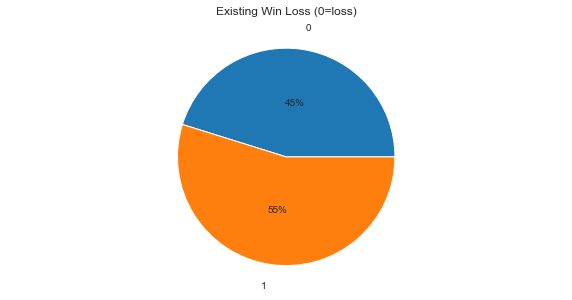

In [18]:
from matplotlib.pyplot import pie, axis, show
sums = data.wonopp.groupby(data.wonopp).count()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

axis('equal');
ax.pie(sums, labels=sums.index, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2, explode=None);
ax.set_title("Existing Win Loss (0=loss)")

show()

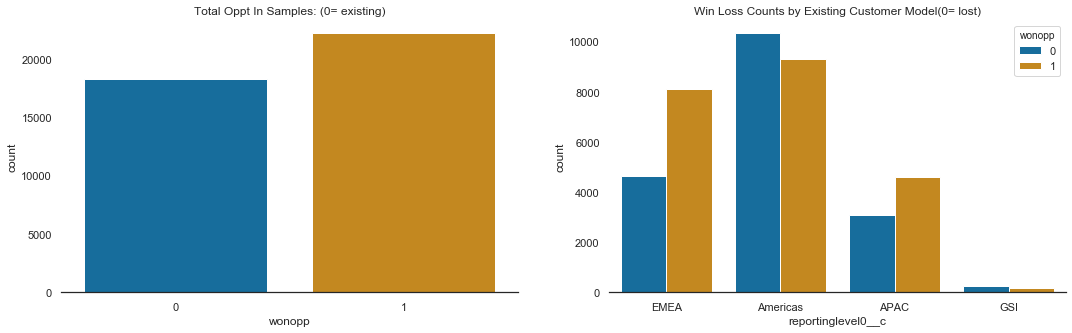

In [19]:
#Specify figure size
sns.set(style='white', palette='colorblind')
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=False)
sns.despine(left=True)

sns.countplot(x="wonopp", data=data, ax=axes[0])
axes[0].set_title('Total Oppt In Samples: (0= existing)')
sns.countplot(x="reportinglevel0__c", hue="wonopp", data=data, ax=axes[1])
axes[1].set_title('Win Loss Counts by Existing Customer Model(0= lost)', fontsize=12);

In [20]:
data.shape

(40474, 34)

In [21]:
# create new column with random numbered column 1 to 31,986.
number_in_sample = len(data)
sample_no = np.random.choice(number_in_sample, size=(1,number_in_sample), replace=False)+1
data['sample_num'] = sample_no[0]
print("min number sample num= ",
      data['sample_num'].min(),
     "\n max number in sample =",
     data['sample_num'].max())

min number sample num=  1 
 max number in sample = 40474


In [22]:
#size of training and test sample
highest_sample_no = int(data['sample_num'].max()*.66)
print("highest sample number", highest_sample_no)

highest sample number 26712


In [23]:
is_training =  data['sample_num']<= highest_sample_no
exist_train = data[is_training].copy()
exist_train.reindex()
print("Size Training Sample", exist_train.shape)

Size Training Sample (26712, 35)


## create dataframe to hold training sample

In [24]:
exist_train2 = exist_train.copy()

# **Viewing Data and Dealing with NaN Values and 'zeros' (Imputation)**  

**veiw of missing data by record**
a line plot for each row's data completeness. 
right plot shows all rows have min - max valid values per row
[help](https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj)
<a id="p7"></a>

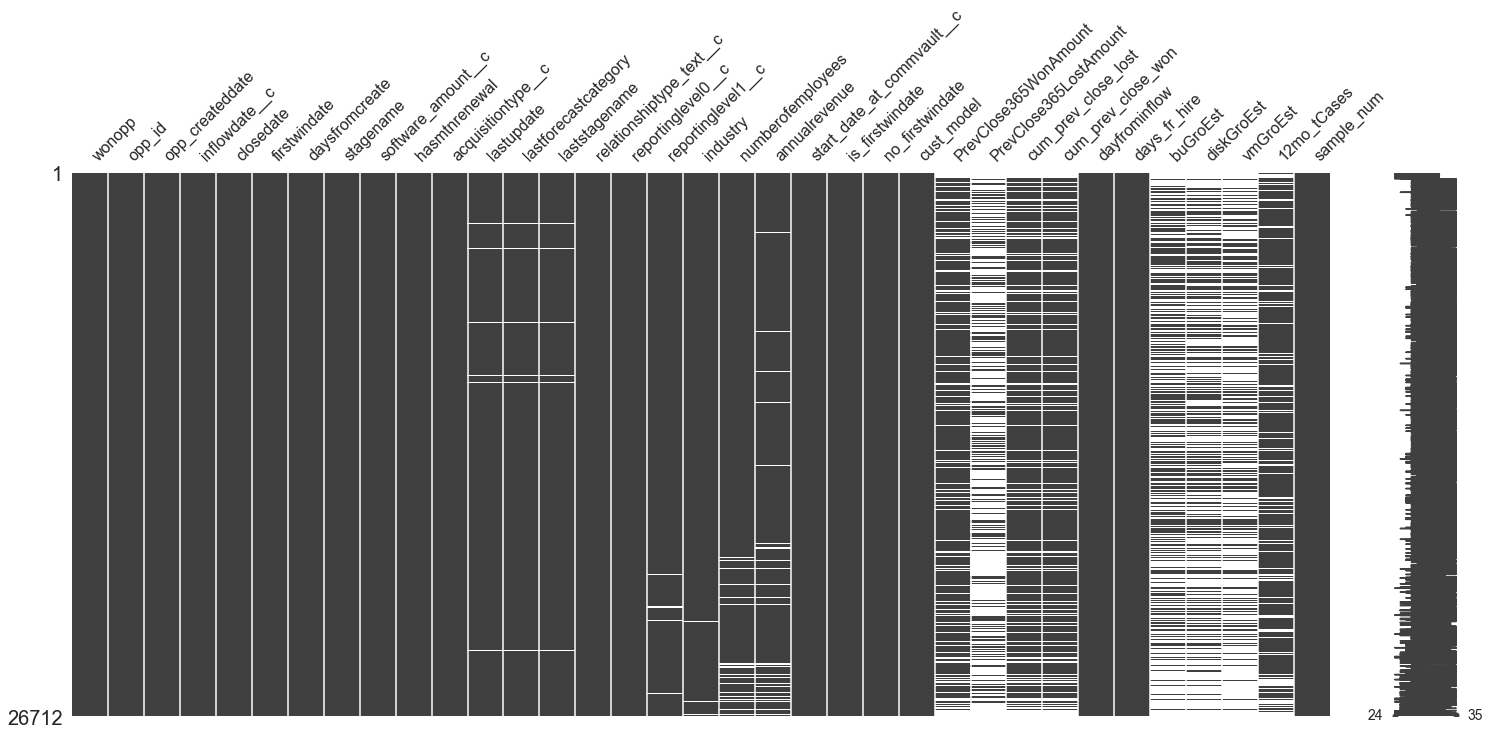

In [25]:
msno.matrix(exist_train);

In [26]:
print("\nData Features Null\n")
na_totals = exist_train.isnull().sum().sort_values(ascending=False)
na_totals_perc = exist_train.isnull().sum().sort_values(ascending=False)/len(exist_train)
print(na_totals[na_totals>0], "\n")
print(na_totals_perc[na_totals_perc>0])


Data Features Null

PrevClose365LostAmount    17967
vmGroEst                  17911
diskGroEst                15982
buGroEst                  15001
12mo_tCases                5362
cum_prev_close_won         5244
cum_prev_close_lost        5244
PrevClose365WonAmount      5244
annualrevenue              1155
numberofemployees           737
reportinglevel1__c          300
lastupdate                  289
lastforecastcategory        289
laststagename               289
industry                    271
inflowdate__c                23
dayfrominflow                23
acquisitiontype__c            6
dtype: int64 

PrevClose365LostAmount   0.67
vmGroEst                 0.67
diskGroEst               0.60
buGroEst                 0.56
12mo_tCases              0.20
cum_prev_close_won       0.20
cum_prev_close_lost      0.20
PrevClose365WonAmount    0.20
annualrevenue            0.04
numberofemployees        0.03
reportinglevel1__c       0.01
lastupdate               0.01
lastforecastcategory     0.0

### vmGroEst

In [27]:
# check for zero values
print("min amount ", exist_train.vmGroEst.min())
print("total null values", exist_train.vmGroEst.isnull().sum())
print("total Zero values", 
     exist_train['vmGroEst'].loc[exist_train['vmGroEst']== 0].count())

min amount  -12.0
total null values 17911
total Zero values 2426


In [28]:
'''Create quintile of vm growth'''
exist_train['vmGroEst_qtile'] = pd.qcut(exist_train['vmGroEst'], 5, duplicates='drop')

In [29]:
exist_train['vmGroEst_qtile'].value_counts()

(-0.00186, 0.0]        2442
(-12.001, -0.00186]    1761
(0.24, 2532.0]         1760
(0.0779, 0.24]         1757
(0.0, 0.0779]          1081
Name: vmGroEst_qtile, dtype: int64

In [30]:
'''Rename quintiles'''
exist_train['vmGroEst_qtile']= exist_train['vmGroEst_qtile'].cat.rename_categories( \
    ['1.vmquintile',	'2.vmquintile',	'3.vmquintile',	'4.vmquintile',	'5.vmquintile',])

In [31]:
exist_train['vmGroEst_qtile'] = exist_train['vmGroEst_qtile'].replace(np.nan, 'NoRpt VM', regex=True)

In [32]:
exist_train['vmGroEst_qtile'].value_counts()

NoRpt VM        17911
2.vmquintile     2442
1.vmquintile     1761
5.vmquintile     1760
4.vmquintile     1757
3.vmquintile     1081
Name: vmGroEst_qtile, dtype: int64

In [33]:
# convert 0 to small number to allow for charting log of all amounts
#copy = exist_train.copy()
copy = exist_train[pd.notnull(exist_train['vmGroEst'])]
#copy.vmGroEst = copy.vmGroEst.replace({0.00: .01})

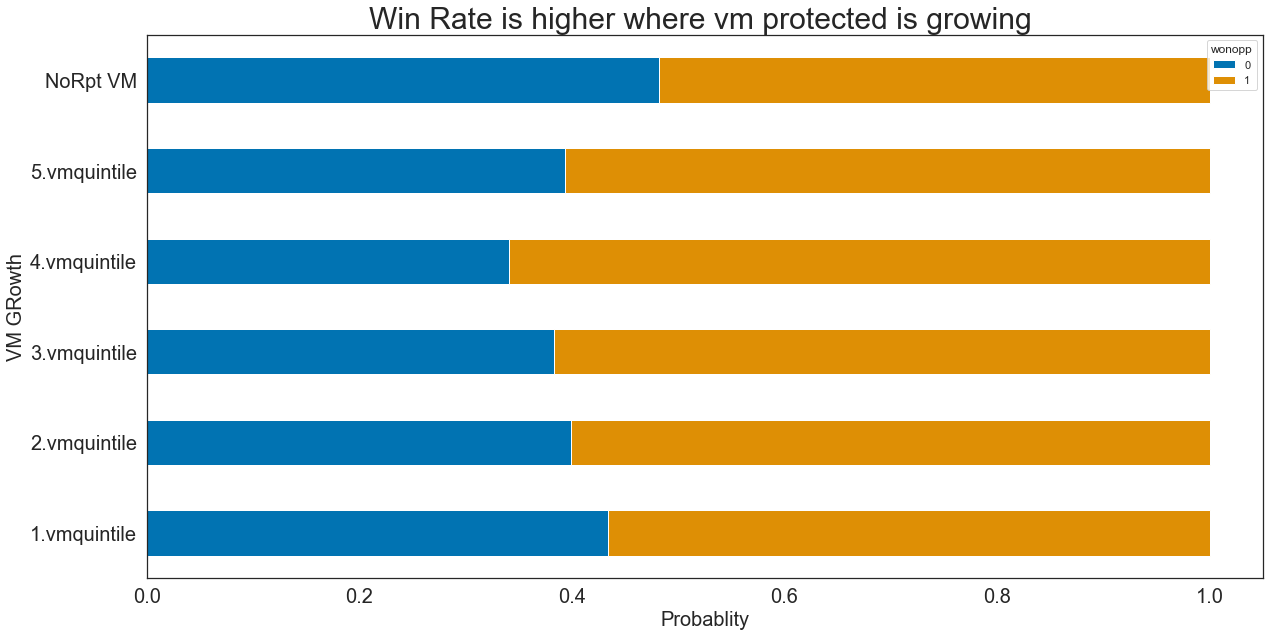

In [34]:
# gca stands for 'get current axis'

fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=False)
ax = plt.gca()
props = exist_train.groupby("vmGroEst_qtile")['wonopp'].value_counts(normalize=True).unstack()
props.plot(figsize = (20,10), fontsize=20,kind='barH', stacked='True', ax=ax)
# Add x and y lables, and set their font size
ax.set_title("Win Rate is higher where vm protected is growing ",fontsize= 30)
plt.xlabel("Probablity", fontsize=20)
plt.ylabel("VM GRowth", fontsize=20);

In [35]:
copy.reset_index(inplace=True)

In [36]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
           'count': group.count(), 'mean': group.mean()}

In [37]:
grouping = pd.qcut(copy['vmGroEst'], 5) #, labels=False)

In [38]:
grouped = copy['vmGroEst'].groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
vmGroEst,,,,
"(-12.001, -0.00186]","1,761.00",-0.00,-1.53,-12.00
"(-0.00186, 0.0]","2,442.00",0.00,-0.00,-0.00
"(0.0, 0.0779]","1,081.00",0.08,0.04,0.00
"(0.0779, 0.24]","1,757.00",0.24,0.15,0.08
"(0.24, 2532.0]","1,760.00","2,532.00",9.08,0.24


In [39]:
print(list(exist_train.columns))

['wonopp', 'opp_id', 'opp_createddate', 'inflowdate__c', 'closedate', 'firstwindate', 'daysfromcreate', 'stagename', 'software_amount__c', 'hasmtnrenewal', 'acquisitiontype__c', 'lastupdate', 'lastforecastcategory', 'laststagename', 'relationshiptype_text__c', 'reportinglevel0__c', 'reportinglevel1__c', 'industry', 'numberofemployees', 'annualrevenue', 'start_date_at_commvault__c', 'is_firstwindate', 'no_firstwindate', 'cust_model', 'PrevClose365WonAmount', 'PrevClose365LostAmount', 'cum_prev_close_lost', 'cum_prev_close_won', 'dayfrominflow', 'days_fr_hire', 'buGroEst', 'diskGroEst', 'vmGroEst', '12mo_tCases', 'sample_num', 'vmGroEst_qtile']


### buGroEst

In [40]:
# check for zero values
print("min amount ", exist_train.buGroEst.min())
print("total null values", exist_train.buGroEst.isnull().sum())
print("total Zero values", 
     exist_train['buGroEst'].loc[exist_train['buGroEst']== 0].count())

min amount  -12.0
total null values 15001
total Zero values 173


In [41]:

'''Create quintile of vm growth'''
exist_train['buGroEst_qtile'] = pd.qcut(exist_train['buGroEst'], 5, duplicates='drop')

In [42]:
exist_train['buGroEst_qtile'].value_counts()

(0.225, 0.389]       2347
(-12.001, 0.0235]    2345
(0.131, 0.225]       2342
(0.0235, 0.131]      2340
(0.389, 858168.0]    2337
Name: buGroEst_qtile, dtype: int64

In [43]:
'''Rename quintiles'''
exist_train['buGroEst_qtile']= exist_train['buGroEst_qtile'].cat.rename_categories( \
    ['1.buquintile',	'2.buquintile',	'3.buquintile',	'4.buquintile',	'5.buquintile',])

In [44]:
exist_train['buGroEst_qtile'] = exist_train['buGroEst_qtile'].replace(np.nan, 'NoRpt BU', regex=True)

In [45]:
exist_train['buGroEst_qtile'].value_counts()

NoRpt BU        15001
4.buquintile     2347
1.buquintile     2345
3.buquintile     2342
2.buquintile     2340
5.buquintile     2337
Name: buGroEst_qtile, dtype: int64

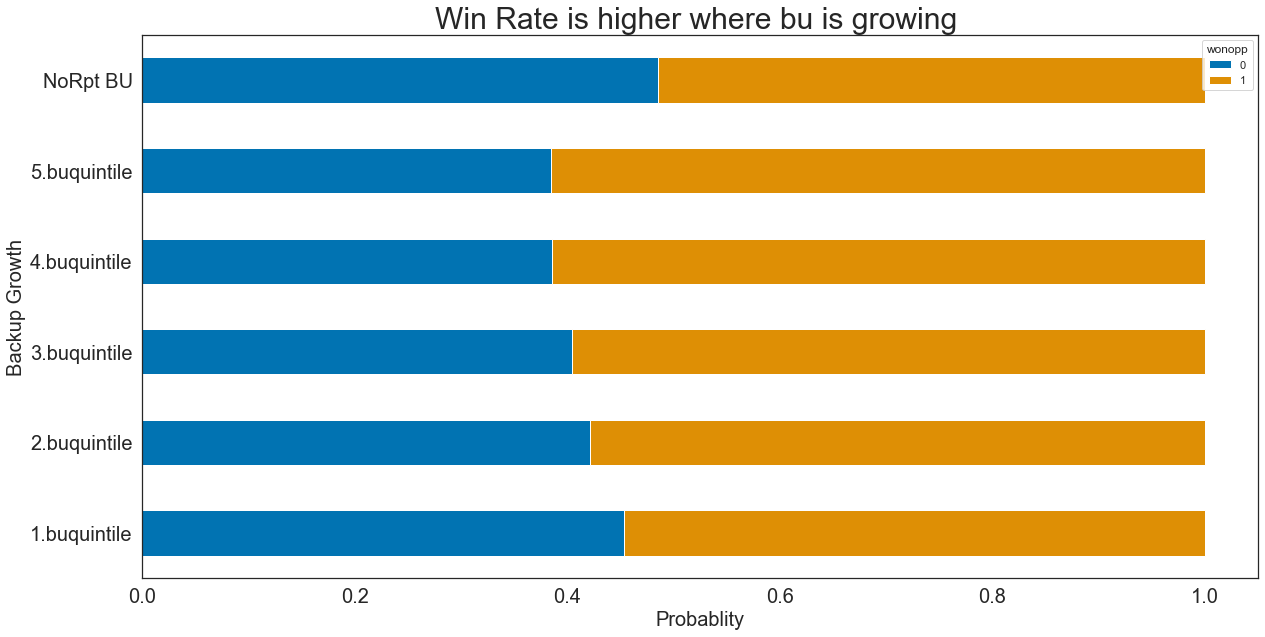

In [46]:
# gca stands for 'get current axis'

fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=False)
ax = plt.gca()
props = exist_train.groupby("buGroEst_qtile")['wonopp'].value_counts(normalize=True).unstack()
props.plot(figsize = (20,10), fontsize=20,kind='barH', stacked='True', ax=ax)
# Add x and y lables, and set their font size
ax.set_title("Win Rate is higher where bu is growing ",fontsize= 30)
plt.xlabel("Probablity", fontsize=20)
plt.ylabel("Backup Growth", fontsize=20);

### diskGroEst

In [47]:
# check for zero values
print("min amount ", exist_train.diskGroEst.min())
print("total null values", exist_train.diskGroEst.isnull().sum())
print("total Zero values", 
     exist_train['diskGroEst'].loc[exist_train['diskGroEst']== 0].count())


min amount  -1.0
total null values 15982
total Zero values 101


In [48]:
'''Create quintile of vm growth'''
exist_train['diskGroEst_qtile'] = pd.qcut(exist_train['diskGroEst'], 5, duplicates='drop')

exist_train['diskGroEst_qtile'].value_counts()

(0.106, inf]         2146
(0.0394, 0.106]      2146
(0.0117, 0.0394]     2146
(-0.0198, 0.0117]    2146
(-1.001, -0.0198]    2146
Name: diskGroEst_qtile, dtype: int64

In [49]:
'''Rename quintiles'''
exist_train['diskGroEst_qtile']= exist_train['diskGroEst_qtile'].cat.rename_categories( \
    ['1.diskquintile',	'2.diskquintile',	'3.diskquintile',	'4.diskquintile',	'5.diskquintile',])

In [50]:
exist_train['diskGroEst_qtile'] = exist_train['diskGroEst_qtile'].replace(np.nan, 'NoRpt Disk', regex=True)
exist_train['diskGroEst_qtile'].value_counts()

NoRpt Disk        15982
4.diskquintile     2146
3.diskquintile     2146
1.diskquintile     2146
2.diskquintile     2146
5.diskquintile     2146
Name: diskGroEst_qtile, dtype: int64

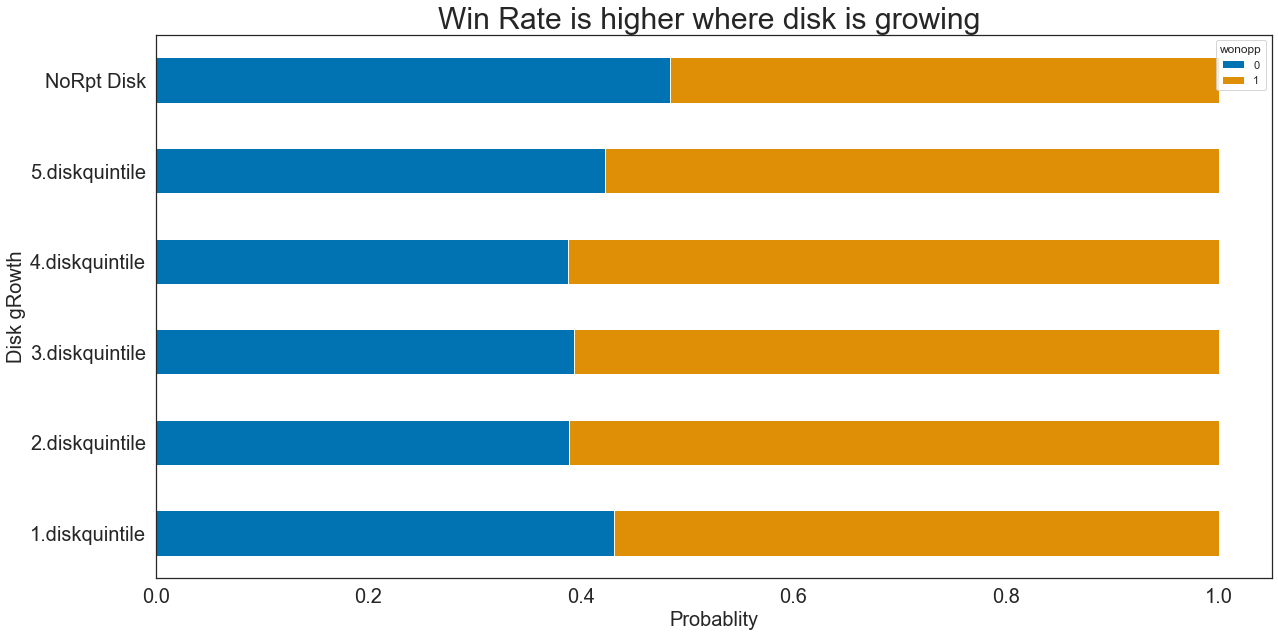

In [51]:
# gca stands for 'get current axis'

fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=False)
ax = plt.gca()
props = exist_train.groupby("diskGroEst_qtile")['wonopp'].value_counts(normalize=True).unstack()
props.plot(figsize = (20,10), fontsize=20,kind='barH', stacked='True', ax=ax)
# Add x and y lables, and set their font size
ax.set_title("Win Rate is higher where disk is growing ",fontsize= 30)
plt.xlabel("Probablity", fontsize=20)
plt.ylabel("Disk gRowth", fontsize=20);

In [52]:
copy = exist_train.copy()
copy.dropna(inplace = True)

### 12mo_tCases

In [53]:
# check for zero values
print("min amount ", exist_train['12mo_tCases'].min())
print("total null values", exist_train['12mo_tCases'].isnull().sum())
print("total Zero values", 
     exist_train['12mo_tCases'].loc[exist_train['12mo_tCases']== 0].count())

min amount  1.0
total null values 5362
total Zero values 0


In [54]:
exist_train['hasCases'] = exist_train['12mo_tCases']

In [55]:
exist_train['hasCases'][:10]

accountid           DateLink
0011W00001qotBKQAY  2017-07     nan
0011W00001qou5LQAQ  2018-06    6.00
                    2018-09    6.00
0011W00001qp60XQAQ  2017-07     nan
0011W00001qp88SQAQ  2017-07     nan
                    2018-07    5.00
                    2018-09    6.00
                    2018-11    8.00
                    2018-11    8.00
0011W00001qpLIXQA2  2017-08     nan
Name: hasCases, dtype: float64

In [56]:
exist_train.head()

wonopp              opp_id     opp_createddate inflowdate__c  closedate firstwindate  daysfromcreate      stagename  software_amount__c  hasmtnrenewal acquisitiontype__c                   lastupdate lastforecastcategory laststagename relationshiptype_text__c reportinglevel0__c reportinglevel1__c            industry  numberofemployees  annualrevenue start_date_at_commvault__c  is_firstwindate  no_firstwindate  cust_model  PrevClose365WonAmount  PrevClose365LostAmount  cum_prev_close_lost  cum_prev_close_won  dayfrominflow  days_fr_hire  buGroEst  diskGroEst  vmGroEst  12mo_tCases  sample_num vmGroEst_qtile buGroEst_qtile diskGroEst_qtile  hasCases
accountid          DateLink                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
0011W00001qotBKQAY 2017-07        0  0061W00000rQUJVQA4 2017-09-18 09:08:39    2017-09-20 2017-11-17   2018-04-16              60  Closed / Lost           20,000.00              0          Perpetual  2017-10-26 11:03:50.0000000             Pipeline   Positioning      End User - Customer               EMEA        East Europe      Communications               1.00     102,843.00                 2017-02-06                0                0           0                    nan                     nan                  nan                 nan          58.00        284.00       nan         nan       nan          nan        3874       NoRpt VM       NoRpt BU       NoRpt Disk       nan
0011W00001qou5LQAQ 2018-06        1  0061W000011SG6mQAG 2018-08-03 09:28:18    2018-08-03 2018-08-21   2017-12-14              18     Closed/Won            1,288.17              0          Perpetual  2018-08-21 08:34:22.0000000             Pipeline    Qualifying      End User - Customer               EMEA        East Europe  Wholesale & Retail               4.00   1,100,978.00                 2017-04-01                0                0           0                    nan                     nan                  nan                 nan          18.00        507.00       nan         nan       nan         6.00        3889       NoRpt VM       NoRpt BU       NoRpt Disk      6.00
                   2018-09        1  0061W000015Mp2GQAS 2018-11-16 09:41:06    2018-12-10 2018-12-13   2017-12-14              27     Closed/Won            2,661.25              0          Perpetual  2018-12-13 12:46:47.0000000             Forecast      Decision      End User - Customer               EMEA        East Europe  Wholesale & Retail               4.00   1,100,978.00                 2017-04-01                0                0           0               1,288.17                     nan                 0.00                1.00           3.00        621.00       nan         nan       nan         6.00       25985       NoRpt VM       NoRpt BU       NoRpt Disk      6.00
0011W00001qp60XQAQ 2017-07        0  0061W00000rQbb5QAC 2017-09-19 08:26:05    2017-09-26 2018-11-09   2018-04-18             416  Closed / Lost            5,000.00              0          Perpetual  2018-09-17 09:45:44.0000000             BestCase    Preference      End User - Customer               EMEA        East Europe       Manufacturing              20.00   9,678,138.00                 2017-06-01                0                0           0                    nan                     nan                  nan                 nan         409.00        526.00       nan         nan       nan        

### hasCases

In [57]:
exist_train['hasCases'].fillna(value=0, inplace=True)

In [58]:
exist_train['hasCases']= np.where(exist_train['12mo_tCases']> 0, 1, 
                                   exist_train['hasCases'])

In [59]:

'''Create quintile of vm growth'''
exist_train['Cases12mo_qtile_qtile'] = pd.qcut(exist_train['12mo_tCases'], 5, duplicates='drop')
exist_train['Cases12mo_qtile_qtile'].value_counts()

(0.999, 4.0]      5022
(21.0, 47.0]      4270
(47.0, 1184.0]    4250
(10.0, 21.0]      3907
(4.0, 10.0]       3901
Name: Cases12mo_qtile_qtile, dtype: int64

In [60]:
'''Rename quintiles'''
exist_train['Cases12mo_qtile_qtile']= exist_train['Cases12mo_qtile_qtile'].cat.rename_categories( \
    ['1.casequintile',	'2.casequintile',	'3.casequintile',	'4.casequintile',	'5.casequintile',])

In [61]:
exist_train['Cases12mo_qtile_qtile'] = exist_train['Cases12mo_qtile_qtile'].replace(np.nan, 'NoRpt Cases', regex=True)

exist_train['Cases12mo_qtile_qtile'].value_counts()

NoRpt Cases       5362
1.casequintile    5022
4.casequintile    4270
5.casequintile    4250
3.casequintile    3907
2.casequintile    3901
Name: Cases12mo_qtile_qtile, dtype: int64

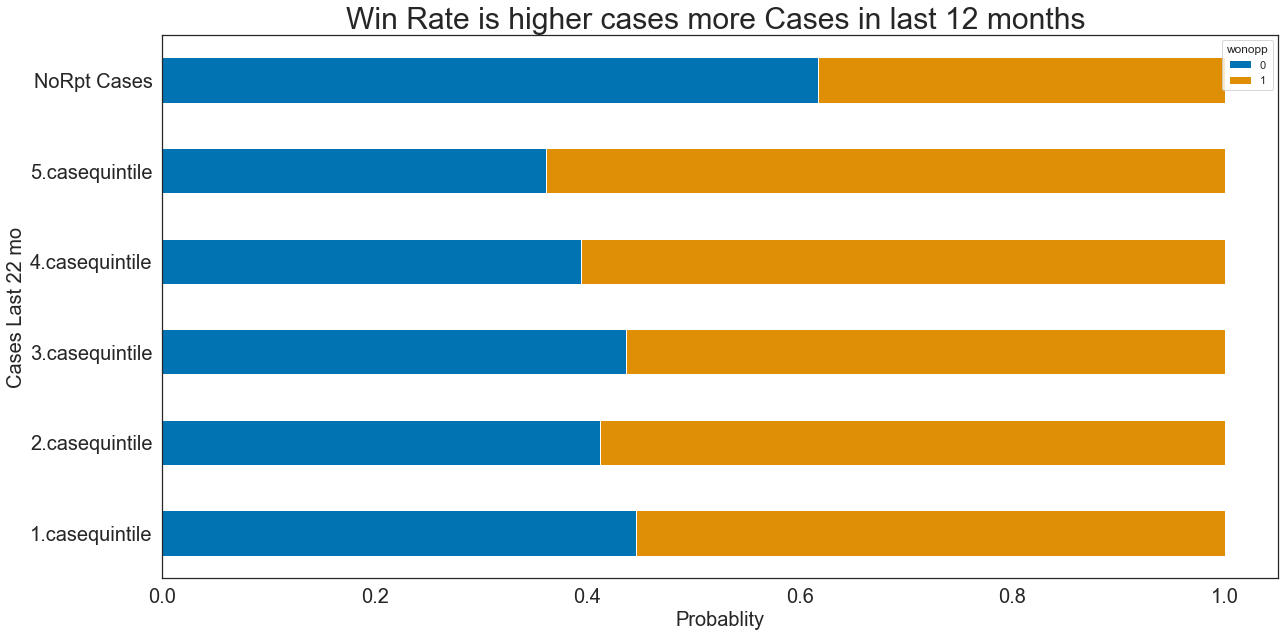

In [62]:
# gca stands for 'get current axis'

fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=False)
ax = plt.gca()
props = exist_train.groupby("Cases12mo_qtile_qtile")['wonopp'].value_counts(normalize=True).unstack()
props.plot(figsize = (20,10), fontsize=20,kind='barH', stacked='True', ax=ax)
# Add x and y lables, and set their font size
ax.set_title("Win Rate is higher cases more Cases in last 12 months ",fontsize= 30)
plt.xlabel("Probablity", fontsize=20)
plt.ylabel("Cases Last 22 mo", fontsize=20);

### cum_prev_close_won

In [63]:
# check for zero values
print("min amount ", exist_train.cum_prev_close_won.min())
print("total null values", exist_train.cum_prev_close_won.isnull().sum())
print("total Zero values", 
     exist_train['cum_prev_close_won'].loc[exist_train['cum_prev_close_won']== 0].count())

min amount  0.0
total null values 5244
total Zero values 4037


In [64]:
#exist_train['cum_prev_close_won'].value_counts()
exist_train.groupby(['accountid','cum_prev_close_won']).size().sort_values(ascending=False)[:10]

accountid           cum_prev_close_won
0014000001aBzEzAAK  0.00                  28
0014000001PRfajAAD  1.00                  20
0014000000FFOv0AAH  4.00                  18
0014000000HDnV9AAL  18.00                 15
0014000000FFN66AAH  15.00                 14
0014000000zb62lAAA  11.00                 13
0014000001hSRcKAAW  19.00                 12
0014000001XpepCAAR  0.00                  12
0014000000FFNCcAAP  4.00                   9
0014000000YAJAiAAP  38.00                  9
dtype: int64

In [65]:
exist_train['cum_prev_close_won'] = exist_train['cum_prev_close_won'].fillna(value=0)

### cum_prev_close_lost

In [66]:
# check for zero values
print("min amount ", exist_train.cum_prev_close_lost.min())
print("total null values", exist_train.cum_prev_close_lost.isnull().sum())
print("total Zero values", 
     exist_train['cum_prev_close_lost'].loc[exist_train['cum_prev_close_lost']== 0].count())

min amount  0.0
total null values 5244
total Zero values 5982


In [67]:
exist_train['cum_prev_close_lost'] = exist_train['cum_prev_close_lost'].fillna(value=0)

### PrevClose365LostAmount

In [68]:
# check for zero values
print("min amount ", exist_train.PrevClose365LostAmount.min())
print("total null values", exist_train.PrevClose365LostAmount.isnull().sum())
print("total Zero values", 
     exist_train['PrevClose365LostAmount'].loc[exist_train['PrevClose365LostAmount']== 0].count())

min amount  0.0
total null values 17967
total Zero values 1693


In [69]:
exist_train['PrevClose365LostAmount'] = exist_train['PrevClose365LostAmount'].fillna(value=0)

### PrevClose365WonAmount

In [70]:
# check for zero values
print("min amount ", exist_train.PrevClose365WonAmount.min())
print("total null values", exist_train.PrevClose365WonAmount.isnull().sum())
print("total Zero values", 
     exist_train['PrevClose365WonAmount'].loc[exist_train['PrevClose365WonAmount']== 0].count())

min amount  0.0
total null values 5244
total Zero values 10965


In [71]:
exist_train['PrevClose365WonAmount'] = exist_train['PrevClose365WonAmount'].fillna(value=0)

### hasmtnrenewal

In [72]:
# check for zero values
print("min amount ", exist_train.hasmtnrenewal.min())
print("total null values", exist_train.hasmtnrenewal.isnull().sum())
print("total Zero values", 
     exist_train['hasmtnrenewal'].loc[exist_train['hasmtnrenewal']== 0].count())

min amount  0
total null values 0
total Zero values 26556


#### days_fr_hire

In [73]:
copy = exist_train.copy()
copy.dropna(inplace = True)

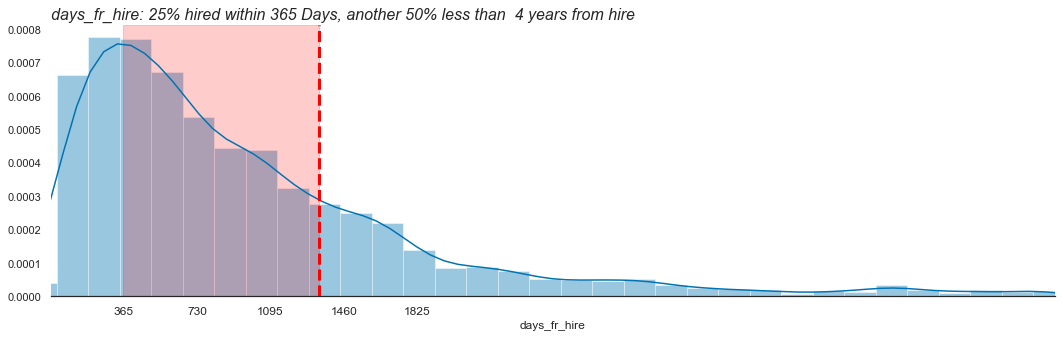

In [74]:
sns.set(style='white', palette='colorblind')
fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=True)
sns.despine(left=True)
sns.set(style='dark')
sns.distplot(copy["days_fr_hire"], kde=True)
#plt.axvline(copy["dayfrominflow"].quantile(.75), color='r', lw=5)
#Add shading and vertical line
plt.axvspan(copy["days_fr_hire"].quantile(q=.25), copy["days_fr_hire"].quantile(.75), alpha=0.2, color='red', zorder=1)
plt.axvline(copy["days_fr_hire"].quantile(.75), linestyle='--', linewidth=3, color='red', zorder=3)
axes.set_title('days_fr_hire: 25% hired within 365 Days, another 50% less than  4 years from hire',
              fontsize=16,
              fontstyle='italic',
               loc='left')
plt.xticks([365, 730, 1095, 1460, 1825], fontsize=12)
plt.xlim(0,5000);

In [75]:
exist_train.head()

wonopp              opp_id     opp_createddate inflowdate__c  closedate firstwindate  daysfromcreate      stagename  software_amount__c  hasmtnrenewal acquisitiontype__c                   lastupdate lastforecastcategory laststagename relationshiptype_text__c reportinglevel0__c reportinglevel1__c            industry  numberofemployees  annualrevenue start_date_at_commvault__c  is_firstwindate  no_firstwindate  cust_model  PrevClose365WonAmount  PrevClose365LostAmount  cum_prev_close_lost  cum_prev_close_won  dayfrominflow  days_fr_hire  buGroEst  diskGroEst  vmGroEst  12mo_tCases  sample_num vmGroEst_qtile buGroEst_qtile diskGroEst_qtile  hasCases Cases12mo_qtile_qtile
accountid          DateLink                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
0011W00001qotBKQAY 2017-07        0  0061W00000rQUJVQA4 2017-09-18 09:08:39    2017-09-20 2017-11-17   2018-04-16              60  Closed / Lost           20,000.00              0          Perpetual  2017-10-26 11:03:50.0000000             Pipeline   Positioning      End User - Customer               EMEA        East Europe      Communications               1.00     102,843.00                 2017-02-06                0                0           0                   0.00                    0.00                 0.00                0.00          58.00        284.00       nan         nan       nan          nan        3874       NoRpt VM       NoRpt BU       NoRpt Disk      0.00           NoRpt Cases
0011W00001qou5LQAQ 2018-06        1  0061W000011SG6mQAG 2018-08-03 09:28:18    2018-08-03 2018-08-21   2017-12-14              18     Closed/Won            1,288.17              0          Perpetual  2018-08-21 08:34:22.0000000             Pipeline    Qualifying      End User - Customer               EMEA        East Europe  Wholesale & Retail               4.00   1,100,978.00                 2017-04-01                0                0           0                   0.00                    0.00                 0.00                0.00          18.00        507.00       nan         nan       nan         6.00        3889       NoRpt VM       NoRpt BU       NoRpt Disk      1.00        2.casequintile
                   2018-09        1  0061W000015Mp2GQAS 2018-11-16 09:41:06    2018-12-10 2018-12-13   2017-12-14              27     Closed/Won            2,661.25              0          Perpetual  2018-12-13 12:46:47.0000000             Forecast      Decision      End User - Customer               EMEA        East Europe  Wholesale & Retail               4.00   1,100,978.00                 2017-04-01                0                0           0               1,288.17                    0.00                 0.00                1.00           3.00        621.00       nan         nan       nan         6.00       25985       NoRpt VM       NoRpt BU       NoRpt Disk      1.00        2.casequintile
0011W00001qp60XQAQ 2017-07        0  0061W00000rQbb5QAC 2017-09-19 08:26:05    2017-09-26 2018-11-09   2018-04-18             416  Closed / Lost            5,000.00              0          Perpetual  2018-09-17 09:45:44.0000000             BestCase    Preference      End User - Customer               EMEA        East Europe       Manufacturing              20.00   9,678,138.00                 2017-06-01                0                0           0                   0.00                    0.00

#### annualrevenue

In [76]:
# check for zero values
print("min amount ", exist_train.annualrevenue.min())
print("total null values", exist_train.annualrevenue.isnull().sum())
print("total Zero values", 
     exist_train['annualrevenue'].loc[exist_train['annualrevenue']== 0].count())

min amount  0.0
total null values 1155
total Zero values 7448


In [77]:
totalmissing = exist_train.annualrevenue.loc[exist_train.annualrevenue == 0].count() \
      + exist_train.annualrevenue.isnull().sum()
perc_misssing = totalmissing/len(exist_train)
print("total of missing and zero values for annualrevenue ", \
      totalmissing, "\n percent missing annualrevenue ", perc_misssing)

total of missing and zero values for annualrevenue  8603 
 percent missing annualrevenue  0.3220649895178197


##### drop annualrevenue as 40+ are missing values

#### replace with most frequent category  
'reportinglevel0__c'
'reportinglevel1__c'
'acquisitiontype__c'
'relationshiptype_text__c'
'stagename'  
'daysfrominflow'

In [78]:
exist_train.reportinglevel0__c.fillna(exist_train.reportinglevel0__c.mode().iloc[0],
                                   inplace = True)
exist_train.reportinglevel1__c.fillna(exist_train.reportinglevel1__c.mode().iloc[0],
                                   inplace = True)
exist_train.acquisitiontype__c.fillna(exist_train.acquisitiontype__c.mode().iloc[0],
                                   inplace = True)
exist_train.relationshiptype_text__c.fillna(exist_train.relationshiptype_text__c.mode().iloc[0],
                                   inplace = True)
exist_train.laststagename.fillna(exist_train.laststagename.mode().iloc[0],
                                   inplace = True)
exist_train.dayfrominflow.fillna(exist_train.dayfrominflow.mode().iloc[0],
                                   inplace = True)

#### industry

In [79]:
industry_count = exist_train.industry.value_counts().count()
print("number of unique industry_count", industry_count)
print("total missing values\n", exist_train.industry.isnull().sum(),
      "\ntotal pcnt missing\n", exist_train.industry.isnull().sum()/len(exist_train))
print("total Zero values", 
     exist_train['industry'].loc[exist_train['industry']== 0].count())

number of unique industry_count 19
total missing values
 271 
total pcnt missing
 0.010145253069781372
total Zero values 0


In [80]:
exist_train['industry'] = exist_train[['industry']].fillna(value='ind_missing')

#### numberofemployees

In [81]:
# check for zero values
print("min amount ", exist_train.numberofemployees.min())
print("total null values", exist_train.numberofemployees.isnull().sum())
print("total Zero values", 
     exist_train['numberofemployees'].loc[exist_train['numberofemployees']== 0].count())

min amount  0.0
total null values 737
total Zero values 1812


In [82]:
totalmissing = exist_train.numberofemployees.loc[exist_train.numberofemployees == 0].count() \
      + exist_train.numberofemployees.isnull().sum()
perc_misssing = totalmissing/len(exist_train)
print("total of missing and zero values for number of empployees ", \
      totalmissing, "\n percent missing employee count ", perc_misssing)

total of missing and zero values for number of empployees  2549 
 percent missing employee count  0.09542527702905061


In [83]:
# fill zero values with nan to create new categorical employees based on quartile and missing
exist_train['numberofemployees'] = exist_train['numberofemployees'].replace({0: np.nan})

In [84]:
## create labels from breakpoints
breaks=[1,101,1001, 5000, pd.np.inf]

#diff=np.diff(breaks).tolist()
diffbreaks=np.diff(breaks).tolist()

## make tuples of *breaks* and length of intervals
jointOrder = list(zip(breaks,diffbreaks))

## format label
segment = "{left:,.0f} to {right:,.0f}"
labels = [segment.format(left=yr[0], right=yr[0]+yr[1]-1) for yr in jointOrder]
labels

['1 to 100', '101 to 1,000', '1,001 to 4,999', '5,000 to inf']

In [85]:
exist_train['emp_segment'] = pd.cut(exist_train['numberofemployees'],breaks, labels=labels, right=False)

In [86]:
exist_train['emp_segment'] = exist_train['emp_segment'].replace({np.nan: 'emp_blank', '1 to 100': 'emp_SMB',
                                 '101 to 1,000': 'emp_MidMkt', '1,001 to 4,999': 'emp_Enter',
                                 '5,000 to inf': 'emp_LgEnter'})

In [87]:
result = exist_train.groupby('emp_segment')['numberofemployees'].describe()
result

,count,mean,std,min,25%,50%,75%,max
emp_segment,,,,,,,,
emp_Enter,"5,808.00","2,635.94","1,272.71","1,001.00","1,502.00","2,300.00","3,500.00","4,999.00"
emp_LgEnter,"5,503.00","42,704.69","101,845.21","5,000.00","8,291.00","12,887.00","39,003.00","2,100,000.00"
emp_MidMkt,"8,300.00",469.94,265.38,101.00,240.00,450.00,650.00,"1,000.00"
emp_SMB,"4,552.00",40.09,33.33,1.00,10.00,30.00,66.00,100.00
emp_blank,0.00,nan,nan,nan,nan,nan,nan,nan


In [88]:
totalmissing = exist_train.emp_segment.loc[exist_train.emp_segment == 0].count() \
      + exist_train.emp_segment.isnull().sum()
perc_misssing = totalmissing/len(exist_train)
print("total of missing and zero values for emp_segment ", \
      totalmissing, "\n percent missing emp_segment count ", perc_misssing)

total of missing and zero values for emp_segment  0 
 percent missing emp_segment count  0.0


In [89]:
print("\nData Features Null\n")
na_totals = exist_train.isnull().sum().sort_values(ascending=False)
na_totals_perc = exist_train.isnull().sum().sort_values(ascending=False)/len(exist_train)
print(na_totals[na_totals>0], "\n")
print(na_totals_perc[na_totals_perc>0])


Data Features Null

vmGroEst                17911
diskGroEst              15982
buGroEst                15001
12mo_tCases              5362
numberofemployees        2549
annualrevenue            1155
lastforecastcategory      289
lastupdate                289
inflowdate__c              23
dtype: int64 

vmGroEst               0.67
diskGroEst             0.60
buGroEst               0.56
12mo_tCases            0.20
numberofemployees      0.10
annualrevenue          0.04
lastforecastcategory   0.01
lastupdate             0.01
inflowdate__c          0.00
dtype: float64


### Confirm all NAs have been imputed or removed  
All missing data has been imputed besides date fields which are not needed for prediction.

## Remove columns such as identifiers and dates

In [90]:
exist_before_feature_engineering = exist_train.copy()

In [91]:
exist_train.head()

wonopp              opp_id     opp_createddate inflowdate__c  closedate firstwindate  daysfromcreate      stagename  software_amount__c  hasmtnrenewal acquisitiontype__c                   lastupdate lastforecastcategory laststagename relationshiptype_text__c reportinglevel0__c reportinglevel1__c            industry  numberofemployees  annualrevenue start_date_at_commvault__c  is_firstwindate  no_firstwindate  cust_model  PrevClose365WonAmount  PrevClose365LostAmount  cum_prev_close_lost  cum_prev_close_won  dayfrominflow  days_fr_hire  buGroEst  diskGroEst  vmGroEst  12mo_tCases  sample_num vmGroEst_qtile buGroEst_qtile diskGroEst_qtile  hasCases Cases12mo_qtile_qtile emp_segment
accountid          DateLink                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
0011W00001qotBKQAY 2017-07        0  0061W00000rQUJVQA4 2017-09-18 09:08:39    2017-09-20 2017-11-17   2018-04-16              60  Closed / Lost           20,000.00              0          Perpetual  2017-10-26 11:03:50.0000000             Pipeline   Positioning      End User - Customer               EMEA        East Europe      Communications               1.00     102,843.00                 2017-02-06                0                0           0                   0.00                    0.00                 0.00                0.00          58.00        284.00       nan         nan       nan          nan        3874       NoRpt VM       NoRpt BU       NoRpt Disk      0.00           NoRpt Cases     emp_SMB
0011W00001qou5LQAQ 2018-06        1  0061W000011SG6mQAG 2018-08-03 09:28:18    2018-08-03 2018-08-21   2017-12-14              18     Closed/Won            1,288.17              0          Perpetual  2018-08-21 08:34:22.0000000             Pipeline    Qualifying      End User - Customer               EMEA        East Europe  Wholesale & Retail               4.00   1,100,978.00                 2017-04-01                0                0           0                   0.00                    0.00                 0.00                0.00          18.00        507.00       nan         nan       nan         6.00        3889       NoRpt VM       NoRpt BU       NoRpt Disk      1.00        2.casequintile     emp_SMB
                   2018-09        1  0061W000015Mp2GQAS 2018-11-16 09:41:06    2018-12-10 2018-12-13   2017-12-14              27     Closed/Won            2,661.25              0          Perpetual  2018-12-13 12:46:47.0000000             Forecast      Decision      End User - Customer               EMEA        East Europe  Wholesale & Retail               4.00   1,100,978.00                 2017-04-01                0                0           0               1,288.17                    0.00                 0.00                1.00           3.00        621.00       nan         nan       nan         6.00       25985       NoRpt VM       NoRpt BU       NoRpt Disk      1.00        2.casequintile     emp_SMB
0011W00001qp60XQAQ 2017-07        0  0061W00000rQbb5QAC 2017-09-19 08:26:05    2017-09-26 2018-11-09   2018-04-18             416  Closed / Lost            5,000.00              0          Perpetual  2018-09-17 09:45:44.0000000             BestCase    Preference      End User - Customer               EMEA        East Europe       Manufacturing              20.00   9,678,138.00                 2017-06-01                0                

In [92]:
exist_train = exist_train.reset_index()

In [93]:
columsToRemove = ['wonopp', 'accountid', 'no_firstwindate','sample_num','DateLink', 'opp_id', 'opp_createddate','inflowdate__c',
'closedate','firstwindate', 'stagename', 'lastupdate', 'lastforecastcategory', 
 'numberofemployees', 'annualrevenue', 'start_date_at_commvault__c', 
'is_firstwindate', 'cust_model', 'buGroEst', 'diskGroEst', 'vmGroEst',
]

In [94]:
#del exist_train['wonopp']

In [95]:
# move the winopp target column to be the first
print("""reorder columns so that target variable is in postion 0 for columns""")
data_columns = list(exist_train.columns.values)
for column in columsToRemove:
    data_columns.remove(column)
new_col_list = list(['wonopp'])
new_col_list.extend(data_columns)
exist_train = exist_train.reindex(columns=new_col_list)
exist_train.head()

reorder columns so that target variable is in postion 0 for columns


,wonopp,daysfromcreate,software_amount__c,hasmtnrenewal,acquisitiontype__c,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,PrevClose365WonAmount,PrevClose365LostAmount,cum_prev_close_lost,cum_prev_close_won,dayfrominflow,days_fr_hire,12mo_tCases,vmGroEst_qtile,buGroEst_qtile,diskGroEst_qtile,hasCases,Cases12mo_qtile_qtile,emp_segment
0,0,60,"20,000.00",0,Perpetual,Positioning,End User - Customer,EMEA,East Europe,Communications,0.00,0.00,0.00,0.00,58.00,284.00,nan,NoRpt VM,NoRpt BU,NoRpt Disk,0.00,NoRpt Cases,emp_SMB
1,1,18,"1,288.17",0,Perpetual,Qualifying,End User - Customer,EMEA,East Europe,Wholesale & Retail,0.00,0.00,0.00,0.00,18.00,507.00,6.00,NoRpt VM,NoRpt BU,NoRpt Disk,1.00,2.casequintile,emp_SMB
2,1,27,"2,661.25",0,Perpetual,Decision,End User - Customer,EMEA,East Europe,Wholesale & Retail,"1,288.17",0.00,0.00,1.00,3.00,621.00,6.00,NoRpt VM,NoRpt BU,NoRpt Disk,1.00,2.casequintile,emp_SMB
3,0,416,"5,000.00",0,Perpetual,Preference,End User - Customer,EMEA,East Europe,Manufacturing,0.00,0.00,0.00,0.00,409.00,526.00,nan,NoRpt VM,NoRpt BU,NoRpt Disk,0.00,NoRpt Cases,emp_SMB
4,1,351,"3,332.80",0,Perpetual,Preference,End User - Customer,Americas,Public Sector,ind_missing,0.00,0.00,0.00,0.00,351.00,432.00,nan,NoRpt VM,NoRpt BU,NoRpt Disk,0.00,NoRpt Cases,emp_blank


## Feature Engineering

In [96]:
kinds = np.array([dt.kind for dt in exist_train.dtypes])
kinds

array(['i', 'i', 'f', 'i', 'O', 'O', 'O', 'O', 'O', 'O', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'O', 'O', 'O', 'f', 'O', 'O'], dtype='<U1')

In [97]:
# feature frame to combine after transformed
feature_frames = []

#  **Numerical Feature Engineering**  
<a id="p9"></a>

In [98]:
all_columns = exist_train.columns.values
is_num = kinds != 'O'
num_cols = all_columns[is_num]
print("Numerical features:\n",list(num_cols))

Numerical features:
 ['wonopp', 'daysfromcreate', 'software_amount__c', 'hasmtnrenewal', 'PrevClose365WonAmount', 'PrevClose365LostAmount', 'cum_prev_close_lost', 'cum_prev_close_won', 'dayfrominflow', 'days_fr_hire', '12mo_tCases', 'hasCases']


In [99]:
#create dataframe for numerical variables
df_num_tranform = exist_train[num_cols].copy()
df_num_tranform = df_num_tranform.reset_index(drop=True)
df_num_tranform.head()

,wonopp,daysfromcreate,software_amount__c,hasmtnrenewal,PrevClose365WonAmount,PrevClose365LostAmount,cum_prev_close_lost,cum_prev_close_won,dayfrominflow,days_fr_hire,12mo_tCases,hasCases
0,0,60,"20,000.00",0,0.00,0.00,0.00,0.00,58.00,284.00,nan,0.00
1,1,18,"1,288.17",0,0.00,0.00,0.00,0.00,18.00,507.00,6.00,1.00
2,1,27,"2,661.25",0,"1,288.17",0.00,0.00,1.00,3.00,621.00,6.00,1.00
3,0,416,"5,000.00",0,0.00,0.00,0.00,0.00,409.00,526.00,nan,0.00
4,1,351,"3,332.80",0,0.00,0.00,0.00,0.00,351.00,432.00,nan,0.00


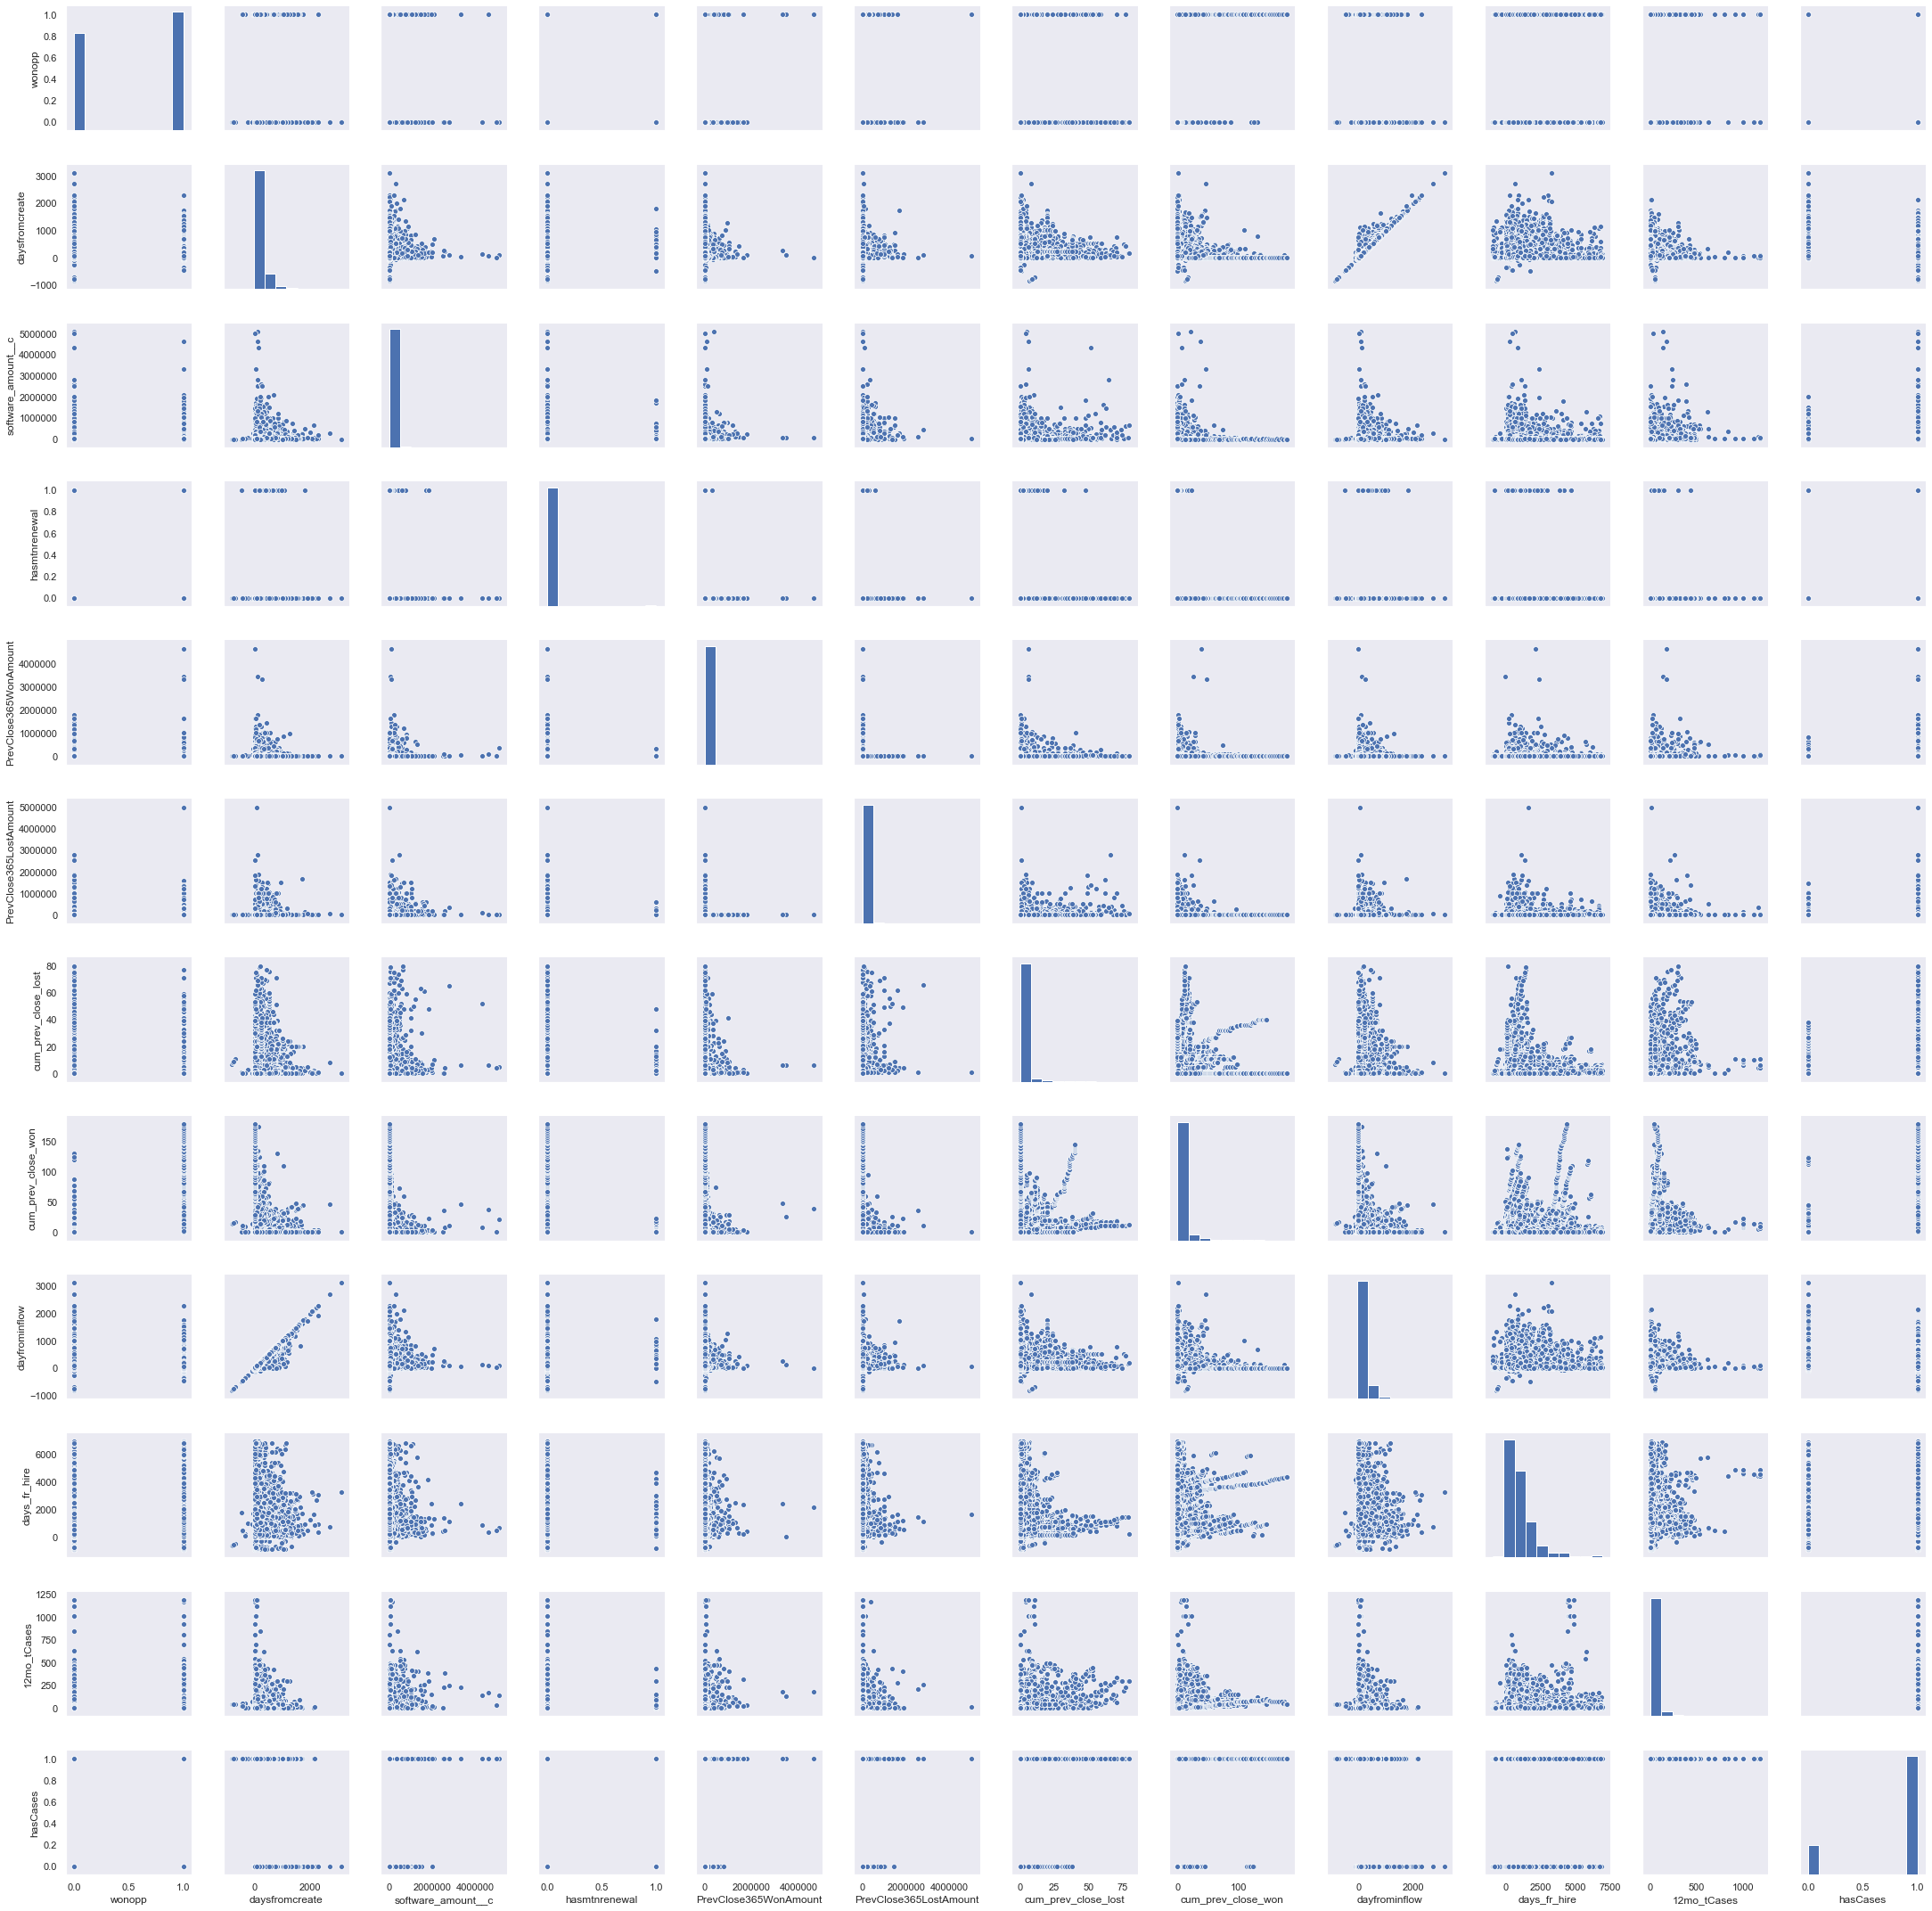

In [100]:
sns.pairplot(df_num_tranform)

In [101]:
for i in  df_num_tranform.columns:
    print(i)

wonopp
daysfromcreate
software_amount__c
hasmtnrenewal
PrevClose365WonAmount
PrevClose365LostAmount
cum_prev_close_lost
cum_prev_close_won
dayfrominflow
days_fr_hire
12mo_tCases
hasCases


#### daysfromcreate

In [102]:
totalmissing = df_num_tranform.daysfromcreate.loc[df_num_tranform.daysfromcreate == 0].count() \
      + df_num_tranform.daysfromcreate.isnull().sum()
perc_misssing = totalmissing/len(df_num_tranform)
print("total of missing and zero values for daysfromcreate ", \
      totalmissing, "\n percent missing daysfromcreate count ", perc_misssing)
print("total null values", df_num_tranform.daysfromcreate.isnull().sum())
print("total Zero values", 
     df_num_tranform['daysfromcreate'].loc[df_num_tranform['daysfromcreate']== 0].count())

total of missing and zero values for daysfromcreate  1933 
 percent missing daysfromcreate count  0.0723644803833483
total null values 0
total Zero values 1933


In [103]:
df_num_tranform.daysfromcreate.min()

-830

#### replace days from create <= 0 to 1

In [104]:
df_num_tranform.loc[df_num_tranform['daysfromcreate'] <= 0, 'daysfromcreate'] = 1

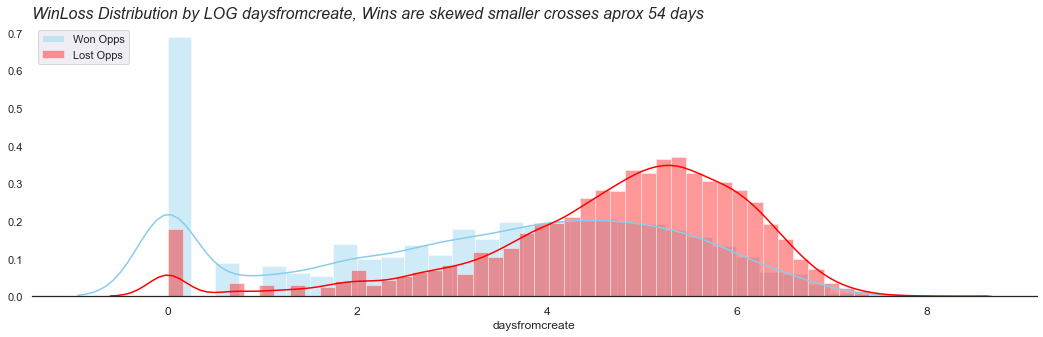

In [105]:
# Method 1: on the same Axis
sns.set(style='white', palette='colorblind')
fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=True)
sns.despine(left=True)
sns.set(style='dark')
#plt.title("WinLoss Distribution by log daysfromcreate, Wins are skewed smaller")
sns.distplot( np.log(df_num_tranform[df_num_tranform.wonopp == 1]["daysfromcreate"]) , color="skyblue", label="Won Opps")
sns.distplot( np.log(df_num_tranform[df_num_tranform.wonopp == 0]["daysfromcreate"]) , color="red", label="Lost Opps");
plt.legend(loc='upper left');
axes.set_title('WinLoss Distribution by LOG daysfromcreate, Wins are skewed smaller crosses aprox 54 days',
              fontsize=16,
              fontstyle='italic',
               loc='left')
plt.xticks(fontsize=12);

In [106]:
np.exp(4)

54.598150033144236

In [107]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["dayfrominflow"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_dayfrominflow_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['dayfrominflow_transf'])
feature_frames.append('df_dayfrominflow_transf')
df_dayfrominflow_transf.head()

,dayfrominflow_transf
0,-0.44
1,-0.63
2,-0.70
3,1.24
4,0.96


#### software_amount__c

In [108]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["software_amount__c"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_software_amount_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['software_amount_transf'])
feature_frames.append('df_software_amount_transf')
df_software_amount_transf.head()

,software_amount_transf
0,-0.18
1,-0.33
2,-0.32
3,-0.30
4,-0.31


#### PrevClose365WonAmount

In [109]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["PrevClose365WonAmount"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_PrevClose365WonAmount_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['PrevClose365WonAmount_transf'])
feature_frames.append('df_PrevClose365WonAmount_transf')
df_PrevClose365WonAmount_transf.head()

,PrevClose365WonAmount_transf
0,-0.19
1,-0.19
2,-0.17
3,-0.19
4,-0.19


#### PrevClose365LostAmount

In [110]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["PrevClose365LostAmount"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_PrevClose365LostAmount_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['PrevClose365LostAmount_transf'])
feature_frames.append('df_PrevClose365LostAmount_transf')
df_PrevClose365LostAmount_transf.head()

,PrevClose365LostAmount_transf
0,-0.20
1,-0.20
2,-0.20
3,-0.20
4,-0.20


#### cum_prev_close_lost

In [111]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["cum_prev_close_lost"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_cum_prev_close_lost_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['cum_prev_close_lost_transf'])
feature_frames.append('df_cum_prev_close_lost_transf')
df_cum_prev_close_lost_transf.head()

,cum_prev_close_lost_transf
0,-0.40
1,-0.40
2,-0.40
3,-0.40
4,-0.40


#### cum_prev_close_won

In [112]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["cum_prev_close_won"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_cum_prev_close_won_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['cum_prev_close_won_transf'])
feature_frames.append('df_cum_prev_close_won_transf')
df_cum_prev_close_won_transf.head()

,cum_prev_close_won_transf
0,-0.41
1,-0.41
2,-0.33
3,-0.41
4,-0.41


#### dayfrominflow

In [113]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["dayfrominflow"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_dayfrominflow_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['dayfrominflow_transf'])
feature_frames.append('df_dayfrominflow_transf')
df_dayfrominflow_transf.head()

,dayfrominflow_transf
0,-0.44
1,-0.63
2,-0.70
3,1.24
4,0.96


#### days_fr_hire

In [114]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["days_fr_hire"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_days_fr_hire_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['days_fr_hire_transf'])
feature_frames.append('df_days_fr_hire_transf')
df_days_fr_hire_transf.head()

,days_fr_hire_transf
0,-0.73
1,-0.52
2,-0.41
3,-0.50
4,-0.59


#### 12mo_tCases

In [115]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_transf = np.array(df_num_tranform["days_fr_hire"]).reshape(-1, 1)
feature_transf = scaler.fit_transform(feature_transf)

df_12mo_tCases_transf = pd.DataFrame(data=feature_transf, 
                                         columns=['12mo_tCases'])
feature_frames.append('df_12mo_tCases_transf')
df_12mo_tCases_transf.head()

,12mo_tCases
0,-0.73
1,-0.52
2,-0.41
3,-0.50
4,-0.59


#  **Categorical Feature Engineering** 
<a id="p8"></a>

In [116]:
#add target at beginning of list
cat_cols = all_columns[~is_num]
cat_cols = list(cat_cols)
cat_cols.insert(0,"wonopp")
cat_cols = np.asarray(cat_cols)
print("categorical features:\n",list(cat_cols))

categorical features:
 ['wonopp', 'acquisitiontype__c', 'laststagename', 'relationshiptype_text__c', 'reportinglevel0__c', 'reportinglevel1__c', 'industry', 'vmGroEst_qtile', 'buGroEst_qtile', 'diskGroEst_qtile', 'Cases12mo_qtile_qtile', 'emp_segment']


In [117]:
# create cat dataframe to use for transformations and encoding
df_cat_tranform = exist_train[cat_cols].copy()
df_cat_tranform = df_cat_tranform.reset_index(drop=True)
df_cat_tranform.head()

,wonopp,acquisitiontype__c,laststagename,relationshiptype_text__c,reportinglevel0__c,reportinglevel1__c,industry,vmGroEst_qtile,buGroEst_qtile,diskGroEst_qtile,Cases12mo_qtile_qtile,emp_segment
0,0,Perpetual,Positioning,End User - Customer,EMEA,East Europe,Communications,NoRpt VM,NoRpt BU,NoRpt Disk,NoRpt Cases,emp_SMB
1,1,Perpetual,Qualifying,End User - Customer,EMEA,East Europe,Wholesale & Retail,NoRpt VM,NoRpt BU,NoRpt Disk,2.casequintile,emp_SMB
2,1,Perpetual,Decision,End User - Customer,EMEA,East Europe,Wholesale & Retail,NoRpt VM,NoRpt BU,NoRpt Disk,2.casequintile,emp_SMB
3,0,Perpetual,Preference,End User - Customer,EMEA,East Europe,Manufacturing,NoRpt VM,NoRpt BU,NoRpt Disk,NoRpt Cases,emp_SMB
4,1,Perpetual,Preference,End User - Customer,Americas,Public Sector,ind_missing,NoRpt VM,NoRpt BU,NoRpt Disk,NoRpt Cases,emp_blank


In [118]:
for i in  df_cat_tranform.columns:
    print(i)

wonopp
acquisitiontype__c
laststagename
relationshiptype_text__c
reportinglevel0__c
reportinglevel1__c
industry
vmGroEst_qtile
buGroEst_qtile
diskGroEst_qtile
Cases12mo_qtile_qtile
emp_segment


### acquisitiontype__c

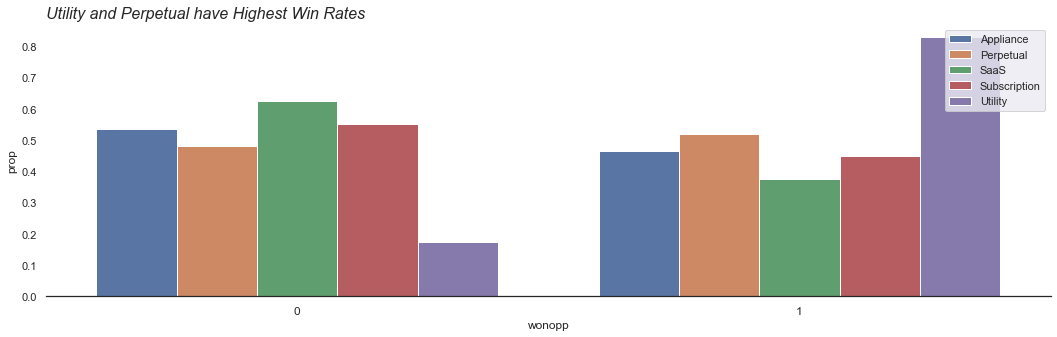

In [119]:
sns.set(style='white', palette='colorblind')
fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=True)
sns.despine(left=True)
sns.set(style='dark')
x, y, hue = "wonopp","prop", "acquisitiontype__c",
hue_order = [0, 1]
prop_df = (df_cat_tranform[x]
           .groupby(df_cat_tranform[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
#axes.set_title('Total Oppt In Samples: (0= existing)')
axes.set_title('Utility and Perpetual have Highest Win Rates',
              fontsize=16,
              fontstyle='italic',
               loc='left')
sns.barplot(x=x, y=y, hue=hue, data=prop_df)
plt.legend(loc='upper right');
plt.xticks(fontsize=12);

In [120]:
means = df_cat_tranform['wonopp'].groupby([df_cat_tranform['acquisitiontype__c']]).mean()
means.sort_values(ascending = False)

acquisitiontype__c
Utility        0.83
Perpetual      0.52
Appliance      0.47
Subscription   0.45
SaaS           0.38
Name: wonopp, dtype: float64

In [121]:
# won = df_cat_tranform['wonopp'].groupby([df_cat_tranform['acquisitiontype__c']]).sum()
# won

In [122]:
# count = df_cat_tranform['wonopp'].groupby([df_cat_tranform['acquisitiontype__c']]).count()
# count

In [123]:
acquisitiontype__c_count = df_cat_tranform.acquisitiontype__c.value_counts().count()
print("number of unique acquisitiontype__c_count", acquisitiontype__c_count)

number of unique acquisitiontype__c_count 5


In [124]:
totalmissing = df_cat_tranform.acquisitiontype__c.isnull().sum()
perc_misssing = totalmissing/len(df_cat_tranform)
print("total of missing for acquisitiontype__c ", \
      totalmissing, "\n percent missing acquisitiontype__c count ", perc_misssing)
print("total null values", df_cat_tranform.acquisitiontype__c.isnull().sum())

total of missing for acquisitiontype__c  0 
 percent missing acquisitiontype__c count  0.0
total null values 0


In [125]:
ohe = OneHotEncoder(sparse=False)
acq_type__c_transf = np.array(df_cat_tranform[['acquisitiontype__c']]).reshape(-1, 1)

acq_type__c_transf = ohe.fit_transform(acq_type__c_transf)

df_acq_type__c_transf = pd.DataFrame(acq_type__c_transf,
             columns=list(ohe.get_feature_names()))
df_acq_type__c_transf.sample(5)

,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility
11155,0.00,1.00,0.00,0.00,0.00
25824,0.00,1.00,0.00,0.00,0.00
346,0.00,1.00,0.00,0.00,0.00
327,0.00,1.00,0.00,0.00,0.00
11989,0.00,0.00,0.00,0.00,1.00


In [126]:
#feature_frames = []
feature_frames.append('df_acq_type__c_transf')
print(feature_frames)

['df_dayfrominflow_transf', 'df_software_amount_transf', 'df_PrevClose365WonAmount_transf', 'df_PrevClose365LostAmount_transf', 'df_cum_prev_close_lost_transf', 'df_cum_prev_close_won_transf', 'df_dayfrominflow_transf', 'df_days_fr_hire_transf', 'df_12mo_tCases_transf', 'df_acq_type__c_transf']


#### laststagename

In [127]:
laststagename__c_count = df_cat_tranform.laststagename.value_counts().count()
print("number of unique laststagename", laststagename__c_count)

number of unique laststagename 15


In [128]:
print("total missing values\n", df_cat_tranform.laststagename.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.laststagename.isnull().sum()/len(df_cat_tranform))

total missing values
 0 
total pcnt missing
 0.0


In [129]:
print(df_cat_tranform.laststagename.value_counts())

Selection                  11803
Qualifying                  5213
Decision                    3173
Motivation                  1302
Sales Ready Lead            1262
Needs Analysis               954
Solution Mapping             927
Positioning                  813
Preference                   798
Intention                    368
Suspect                       46
Sales Qualified Lead          28
Sales Disqualified Lead       17
Prospect                       7
PO in Channel                  1
Name: laststagename, dtype: int64


#### anything less than 100 go in 'other stage'

In [130]:
names = df_cat_tranform['laststagename'].value_counts()
names = list(pd.DataFrame(names).index)
print(names)

['Selection', 'Qualifying', 'Decision', 'Motivation', 'Sales Ready Lead', 'Needs Analysis', 'Solution Mapping', 'Positioning', 'Preference', 'Intention', 'Suspect', 'Sales Qualified Lead', 'Sales Disqualified Lead', 'Prospect', 'PO in Channel']


In [131]:
counts = df_cat_tranform['laststagename'].value_counts()
idx = counts[counts.lt(100)].index

In [132]:
idx

Index(['Suspect', 'Sales Qualified Lead', 'Sales Disqualified Lead', 'Prospect', 'PO in Channel'], dtype='object')

In [133]:
df_cat_tranform['laststagename_counts'] = df_cat_tranform['laststagename'].map(counts)
df_cat_tranform.loc[df_cat_tranform['laststagename_counts'].isin(idx), 'laststagename'] = 'stage_other'

In [134]:
s = df_cat_tranform.laststagename.value_counts()
df_cat_tranform.laststagename = np.where(df_cat_tranform.laststagename.isin(s.index[s < 100]), 'Other_stage', df_cat_tranform.laststagename)

In [135]:
df_cat_tranform.wonopp.sum()

14633

In [136]:
print(df_cat_tranform.laststagename.value_counts())

Selection           11803
Qualifying           5213
Decision             3173
Motivation           1302
Sales Ready Lead     1262
Needs Analysis        954
Solution Mapping      927
Positioning           813
Preference            798
Intention             368
Other_stage            99
Name: laststagename, dtype: int64


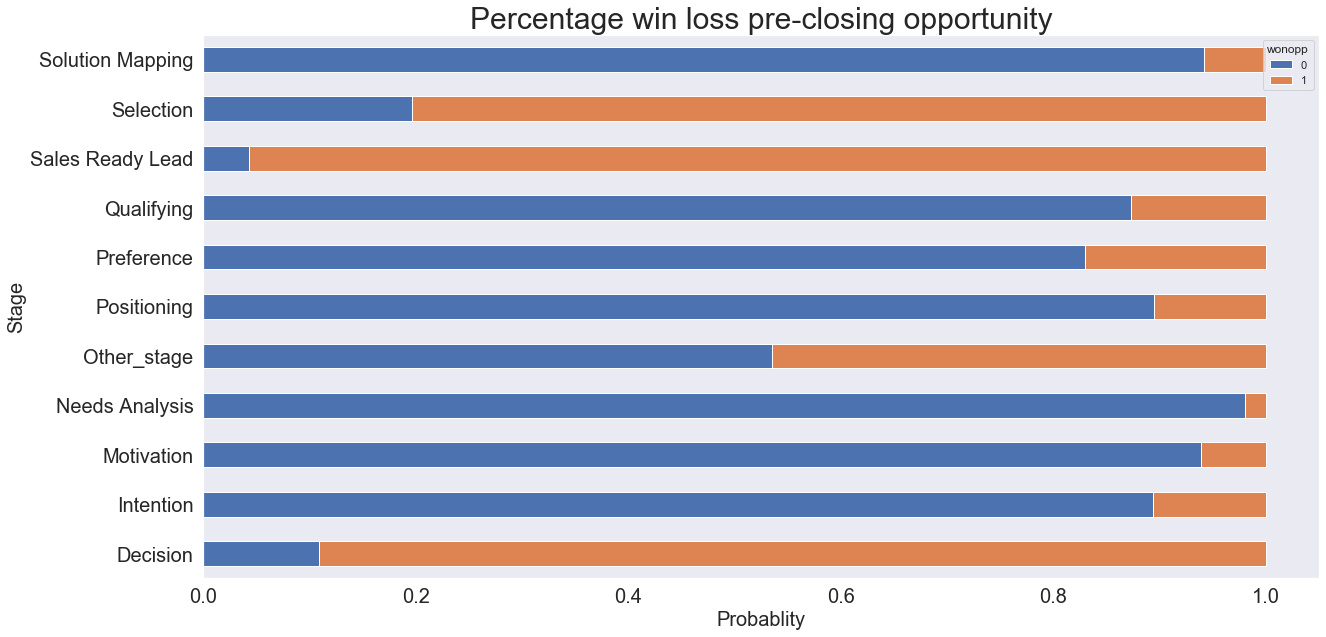

In [137]:
# gca stands for 'get current axis'

fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=False)
ax = plt.gca()
props = df_cat_tranform.groupby("laststagename")['wonopp'].value_counts(normalize=True).unstack()
props.plot(figsize = (20,10), fontsize=20,kind='barH', stacked='True', ax=ax)
# Add x and y lables, and set their font size
ax.set_title("Percentage win loss pre-closing opportunity",fontsize= 30)
plt.xlabel("Probablity", fontsize=20)
plt.ylabel("Stage", fontsize=20);

In [138]:
means = df_cat_tranform['wonopp'].groupby([df_cat_tranform['laststagename']]).mean()
count = df_cat_tranform['wonopp'].groupby([df_cat_tranform['laststagename']]).count()
print(means.sort_values(ascending = False), count.sort_values(ascending = False))

laststagename
Sales Ready Lead   0.96
Decision           0.89
Selection          0.80
Other_stage        0.46
Preference         0.17
Qualifying         0.13
Intention          0.11
Positioning        0.11
Motivation         0.06
Solution Mapping   0.06
Needs Analysis     0.02
Name: wonopp, dtype: float64 laststagename
Selection           11803
Qualifying           5213
Decision             3173
Motivation           1302
Sales Ready Lead     1262
Needs Analysis        954
Solution Mapping      927
Positioning           813
Preference            798
Intention             368
Other_stage            99
Name: wonopp, dtype: int64


they die at qualifying


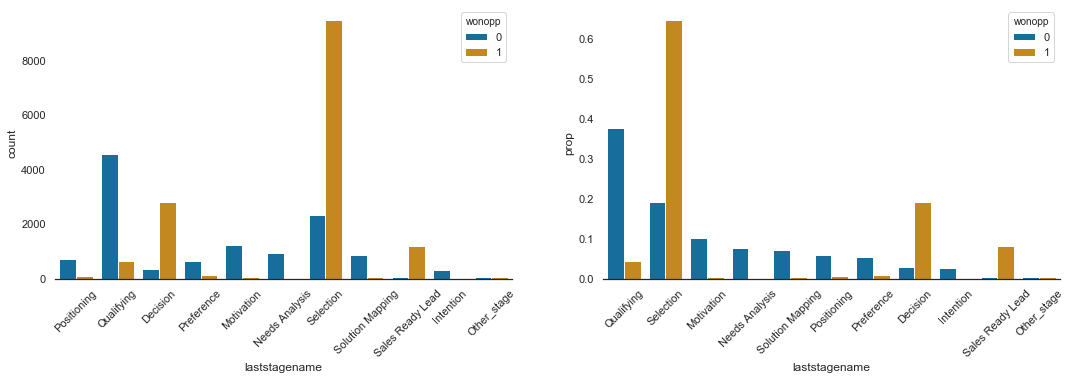

In [139]:
print("they die at qualifying")
sns.set(style='white', palette='colorblind')
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=False)
sns.despine(left=True)
x, y, hue = "laststagename", "prop", "wonopp"
hue_order = [0, 1]

plt.xticks(rotation=45)
chart = sns.countplot(x=x, hue=hue, data=df_cat_tranform, ax=axes[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
prop_df = (df_cat_tranform[x]
           .groupby(df_cat_tranform[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1]);

In [140]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(df_cat_tranform[['laststagename']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_laststagename_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_laststagename_transf')
df_laststagename_transf.sample(5)

,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Ready Lead,x0_Selection,x0_Solution Mapping
18773,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
17534,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
17070,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
23635,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
24712,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### relationshiptype_text__c  


In [141]:

data_count = df_cat_tranform.relationshiptype_text__c.value_counts().count()
print("number of unique relationshiptype_text__c\n", data_count)
print("total missing values\n", df_cat_tranform.relationshiptype_text__c.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.relationshiptype_text__c.isnull().sum()/len(df_cat_tranform))

number of unique relationshiptype_text__c
 35
total missing values
 0 
total pcnt missing
 0.0


In [142]:
# reduce classes to those with > 100 records
s = df_cat_tranform.relationshiptype_text__c.value_counts()
df_cat_tranform.relationshiptype_text__c = np.where(df_cat_tranform.relationshiptype_text__c.isin(s.index[s < 100]), 'Other_relationship', df_cat_tranform.relationshiptype_text__c)
df_cat_tranform.relationshiptype_text__c.value_counts()

End User - Customer            18463
End User - Former Customer      2901
Service Provider-Contracted     2714
End User - Dormant Customer     1303
Other_relationship               824
Aggregator-Contracted            319
End User - Prospect              188
Name: relationshiptype_text__c, dtype: int64

In [143]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(df_cat_tranform[['relationshiptype_text__c']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_relationship_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_relationship_transf')
df_relationship_transf.sample(5)

,x0_Aggregator-Contracted,x0_End User - Customer,x0_End User - Dormant Customer,x0_End User - Former Customer,x0_End User - Prospect,x0_Other_relationship,x0_Service Provider-Contracted
20135,0.00,1.00,0.00,0.00,0.00,0.00,0.00
11563,0.00,1.00,0.00,0.00,0.00,0.00,0.00
11493,0.00,1.00,0.00,0.00,0.00,0.00,0.00
9278,0.00,0.00,0.00,1.00,0.00,0.00,0.00
13751,0.00,1.00,0.00,0.00,0.00,0.00,0.00


#### reportinglevel0__c

In [144]:
reportinglevel0__c_count = df_cat_tranform.reportinglevel0__c.value_counts().count()
print("number of unique reportinglevel0__c", reportinglevel0__c_count)
print("total missing values\n", df_cat_tranform.reportinglevel0__c.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.reportinglevel0__c.isnull().sum()/len(df_cat_tranform))

number of unique reportinglevel0__c 4
total missing values
 0 
total pcnt missing
 0.0


In [145]:
ohe = OneHotEncoder(sparse=False)
reporting0_transf = np.array(df_cat_tranform[['reportinglevel0__c']]).reshape(-1, 1)

reporting0_transf = ohe.fit_transform(reporting0_transf)

df_reporting0_transf = pd.DataFrame(reporting0_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_reporting0_transf')
df_reporting0_transf.head()

,x0_APAC,x0_Americas,x0_EMEA,x0_GSI
0,0.00,0.00,1.00,0.00
1,0.00,0.00,1.00,0.00
2,0.00,0.00,1.00,0.00
3,0.00,0.00,1.00,0.00
4,0.00,1.00,0.00,0.00


#### reportinglevel1__c

In [146]:
reportinglevel1__c_count = df_cat_tranform.reportinglevel1__c.value_counts().count()
print("number of unique reportinglevel0__c", reportinglevel1__c_count)
print("total missing values\n", df_cat_tranform.reportinglevel1__c.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.reportinglevel1__c.isnull().sum()/len(df_cat_tranform))

number of unique reportinglevel0__c 20
total missing values
 0 
total pcnt missing
 0.0


In [147]:
ohe = OneHotEncoder(sparse=False)
reporting1_transf = np.array(df_cat_tranform[['reportinglevel1__c']]).reshape(-1, 1)
reporting1_transf = ohe.fit_transform(reporting1_transf)

df_reporting1_transf = pd.DataFrame(reporting1_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_reporting1_transf')
df_reporting1_transf.head()

,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated
0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


#### industry

In [148]:
industry_count = df_cat_tranform.industry.value_counts().count()
print("number of unique industry_count", industry_count)
print("total missing values\n", df_cat_tranform.industry.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.industry.isnull().sum()/len(df_cat_tranform))

number of unique industry_count 20
total missing values
 0 
total pcnt missing
 0.0


In [149]:
industry_transf = np.array(df_cat_tranform[['industry']]).reshape(-1, 1)
industry_transf = ohe.fit_transform(industry_transf)
df_industry_transf = pd.DataFrame(industry_transf,
             columns=list(ohe.get_feature_names()))
df_industry_transf.head()

,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing
0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [150]:
feature_frames.append('df_industry_transf')

#### emp_segment

In [151]:
emp_segment_count = df_cat_tranform.emp_segment.value_counts().count()
print("number of unique emp_segmen", emp_segment_count)
print("total missing values\n", df_cat_tranform.emp_segment.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.emp_segment.isnull().sum()/len(df_cat_tranform))

number of unique emp_segmen 5
total missing values
 0 
total pcnt missing
 0.0


In [152]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(df_cat_tranform[['emp_segment']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_emp_segment_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_emp_segment_transf')
df_emp_segment_transf.sample(5)

,x0_emp_Enter,x0_emp_LgEnter,x0_emp_MidMkt,x0_emp_SMB,x0_emp_blank
26508,0.00,0.00,1.00,0.00,0.00
304,0.00,0.00,1.00,0.00,0.00
18565,1.00,0.00,0.00,0.00,0.00
7368,0.00,0.00,1.00,0.00,0.00
2173,0.00,0.00,0.00,1.00,0.00


#### vmGroEst_qtile

In [153]:
vmGroEst_qtile_count = df_cat_tranform.vmGroEst_qtile.value_counts().count()
print("number of unique vmGroEst_qtile", vmGroEst_qtile_count)
print("total missing values\n", df_cat_tranform.vmGroEst_qtile.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.vmGroEst_qtile.isnull().sum()/len(df_cat_tranform))

number of unique vmGroEst_qtile 6
total missing values
 0 
total pcnt missing
 0.0


In [154]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(df_cat_tranform[['vmGroEst_qtile']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_vmGroEst_qtile_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_vmGroEst_qtile_transf')
df_vmGroEst_qtile_transf.sample(5)

,x0_1.vmquintile,x0_2.vmquintile,x0_3.vmquintile,x0_4.vmquintile,x0_5.vmquintile,x0_NoRpt VM
2411,0.00,0.00,0.00,0.00,0.00,1.00
943,0.00,0.00,0.00,0.00,0.00,1.00
5944,0.00,1.00,0.00,0.00,0.00,0.00
20709,0.00,0.00,0.00,0.00,0.00,1.00
21597,0.00,0.00,0.00,0.00,0.00,1.00


#### buGroEst_qtile

In [155]:
buGroEst_qtile_count = df_cat_tranform.buGroEst_qtile.value_counts().count()
print("number of unique buGroEst_qtile", buGroEst_qtile_count)
print("total missing values\n", df_cat_tranform.buGroEst_qtile.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.buGroEst_qtile.isnull().sum()/len(df_cat_tranform))

number of unique buGroEst_qtile 6
total missing values
 0 
total pcnt missing
 0.0


In [156]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(df_cat_tranform[['buGroEst_qtile']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_buGroEst_qtile_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_buGroEst_qtile_transf')
df_buGroEst_qtile_transf.sample(5)

,x0_1.buquintile,x0_2.buquintile,x0_3.buquintile,x0_4.buquintile,x0_5.buquintile,x0_NoRpt BU
10011,0.00,0.00,0.00,1.00,0.00,0.00
8567,0.00,0.00,0.00,0.00,1.00,0.00
24034,0.00,0.00,0.00,0.00,0.00,1.00
6677,0.00,0.00,1.00,0.00,0.00,0.00
21342,0.00,0.00,0.00,0.00,0.00,1.00


#### diskGroEst_qtile

In [157]:
diskGroEst_qtile_count = df_cat_tranform.diskGroEst_qtile.value_counts().count()
print("number of unique diskGroEst_qtile", diskGroEst_qtile_count)
print("total missing values\n", df_cat_tranform.diskGroEst_qtile.isnull().sum(),
      "\ntotal pcnt missing\n", df_cat_tranform.diskGroEst_qtile.isnull().sum()/len(df_cat_tranform))

number of unique diskGroEst_qtile 6
total missing values
 0 
total pcnt missing
 0.0


In [158]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(df_cat_tranform[['diskGroEst_qtile']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_diskGroEst_qtile_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_diskGroEst_qtile_transf')
df_diskGroEst_qtile_transf.sample(5)

,x0_1.diskquintile,x0_2.diskquintile,x0_3.diskquintile,x0_4.diskquintile,x0_5.diskquintile,x0_NoRpt Disk
1941,0.00,0.00,1.00,0.00,0.00,0.00
12373,0.00,0.00,0.00,0.00,0.00,1.00
18125,0.00,0.00,0.00,0.00,0.00,1.00
23998,0.00,0.00,0.00,0.00,0.00,1.00
11140,1.00,0.00,0.00,0.00,0.00,0.00


#### Cases12mo_qtile_qtile

In [159]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(df_cat_tranform[['Cases12mo_qtile_qtile']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_Cases12mo_qtile_qtile_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_Cases12mo_qtile_qtile_transf')
df_Cases12mo_qtile_qtile_transf.sample(5)

,x0_1.casequintile,x0_2.casequintile,x0_3.casequintile,x0_4.casequintile,x0_5.casequintile,x0_NoRpt Cases
779,0.00,0.00,0.00,0.00,1.00,0.00
1247,0.00,0.00,0.00,0.00,0.00,1.00
16104,0.00,0.00,1.00,0.00,0.00,0.00
8696,0.00,0.00,0.00,0.00,1.00,0.00
17977,0.00,0.00,0.00,0.00,1.00,0.00


#### hasmtnrenewal

In [160]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(df_num_tranform[['hasmtnrenewal']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_hasmtnrenewal_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_hasmtnrenewal_transf')
df_hasmtnrenewal_transf.sample(5)

,x0_0.0,x0_1.0
4838,1.00,0.00
12852,1.00,0.00
22006,1.00,0.00
1902,1.00,0.00
15370,1.00,0.00


In [161]:
df_hasmtnrenewal_transf = df_hasmtnrenewal_transf.rename(columns={'x0_0.0':'renewalNo', 'x0_1.0':'renewalYes'})

#### hasCases

In [162]:
ohe = OneHotEncoder(sparse=False)
cat_transf = np.array(df_num_tranform[['hasCases']]).reshape(-1, 1)

cat_transf = ohe.fit_transform(cat_transf)

df_hasCases_transf = pd.DataFrame(cat_transf,
             columns=list(ohe.get_feature_names()))
feature_frames.append('df_hasCases_transf')
df_hasCases_transf.sample(5)

,x0_0.0,x0_1.0
4426,1.00,0.00
22507,0.00,1.00
12891,0.00,1.00
13777,0.00,1.00
2591,0.00,1.00


In [163]:
df_hasCases_transf = df_hasCases_transf.rename(columns={'x0_0.0':'casesNo', 'x0_1.0':'casesYes'})

In [164]:
print(feature_frames)

['df_dayfrominflow_transf', 'df_software_amount_transf', 'df_PrevClose365WonAmount_transf', 'df_PrevClose365LostAmount_transf', 'df_cum_prev_close_lost_transf', 'df_cum_prev_close_won_transf', 'df_dayfrominflow_transf', 'df_days_fr_hire_transf', 'df_12mo_tCases_transf', 'df_acq_type__c_transf', 'df_laststagename_transf', 'df_relationship_transf', 'df_reporting0_transf', 'df_reporting1_transf', 'df_industry_transf', 'df_emp_segment_transf', 'df_vmGroEst_qtile_transf', 'df_buGroEst_qtile_transf', 'df_diskGroEst_qtile_transf', 'df_Cases12mo_qtile_qtile_transf', 'df_hasmtnrenewal_transf', 'df_hasCases_transf']


## Combine engineered numerical and categorical features

In [165]:
train_features_scaled = pd.concat([df_software_amount_transf, df_PrevClose365WonAmount_transf, 
                                   df_PrevClose365LostAmount_transf, df_cum_prev_close_lost_transf, 
                                   df_cum_prev_close_won_transf, df_dayfrominflow_transf, 
                                   df_days_fr_hire_transf, df_12mo_tCases_transf, 
                                   df_acq_type__c_transf, df_laststagename_transf, 
                                   df_relationship_transf, df_reporting0_transf, 
                                   df_reporting1_transf, df_industry_transf, df_emp_segment_transf, 
                                   df_vmGroEst_qtile_transf, df_buGroEst_qtile_transf, df_diskGroEst_qtile_transf, 
                                   df_Cases12mo_qtile_qtile_transf, df_hasmtnrenewal_transf, df_hasCases_transf],
                                  axis=1, join_axes=[df_dayfrominflow_transf.index])

In [166]:
print(train_features_scaled.shape)
train_features_scaled.sample(5)

(26712, 108)


,software_amount_transf,PrevClose365WonAmount_transf,PrevClose365LostAmount_transf,cum_prev_close_lost_transf,cum_prev_close_won_transf,dayfrominflow_transf,days_fr_hire_transf,12mo_tCases,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Ready Lead,x0_Selection,x0_Solution Mapping,x0_Aggregator-Contracted,x0_End User - Customer,x0_End User - Dormant Customer,x0_End User - Former Customer,x0_End User - Prospect,x0_Other_relationship,x0_Service Provider-Contracted,x0_APAC,x0_Americas,x0_EMEA,x0_GSI,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing,x0_emp_Enter,x0_emp_LgEnter,x0_emp_MidMkt,x0_emp_SMB,x0_emp_blank,x0_1.vmquintile,x0_2.vmquintile,x0_3.vmquintile,x0_4.vmquintile,x0_5.vmquintile,x0_NoRpt VM,x0_1.buquintile,x0_2.buquintile,x0_3.buquintile,x0_4.buquintile,x0_5.buquintile,x0_NoRpt BU,x0_1.diskquintile,x0_2.diskquintile,x0_3.diskquintile,x0_4.diskquintile,x0_5.diskquintile,x0_NoRpt Disk,x0_1.casequintile,x0_2.casequintile,x0_3.casequintile,x0_4.casequintile,x0_5.casequintile,x0_NoRpt Cases,renewalNo,renewalYes,casesNo,casesYes
20294,0.19,-0.19,0.09,-0.21,-0.33,-0.68,-0.88,-0.88,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
6902,0.06,-0.19,-0.20,-0.40,-0.41,1.80,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
7891,-0.10,-0.19,0.03,0.16,-0.41,-0.45,-0.16,-0.16,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
26396,-0.32,-0.19,-0.20,-0.40,-0.41,-0.55,-0.67,-0.67,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
518,-0.29,-0.16,-0.20,-0.40,-0.09,-0.71,0.80,0.80,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [167]:
exist_train.iloc[23077]

wonopp                                        1
daysfromcreate                               49
software_amount__c                    28,888.79
hasmtnrenewal                                 0
acquisitiontype__c                    Perpetual
laststagename                          Decision
relationshiptype_text__c    End User - Customer
reportinglevel0__c                     Americas
reportinglevel1__c              US West & LATAM
industry                             Healthcare
PrevClose365WonAmount                      0.00
PrevClose365LostAmount               129,870.13
cum_prev_close_lost                        4.00
cum_prev_close_won                         1.00
dayfrominflow                             49.00
days_fr_hire                             729.00
12mo_tCases                               20.00
vmGroEst_qtile                     2.vmquintile
buGroEst_qtile                     2.buquintile
diskGroEst_qtile                 4.diskquintile
hasCases                                

In [168]:
train_features_scaled.iloc[23077]

software_amount_transf           -0.10
PrevClose365WonAmount_transf     -0.19
PrevClose365LostAmount_transf     1.44
cum_prev_close_lost_transf        0.35
cum_prev_close_won_transf        -0.33
dayfrominflow_transf             -0.48
days_fr_hire_transf              -0.31
12mo_tCases                      -0.31
x0_Appliance                      0.00
x0_Perpetual                      1.00
x0_SaaS                           0.00
x0_Subscription                   0.00
x0_Utility                        0.00
x0_Decision                       1.00
x0_Intention                      0.00
x0_Motivation                     0.00
x0_Needs Analysis                 0.00
x0_Other_stage                    0.00
x0_Positioning                    0.00
x0_Preference                     0.00
x0_Qualifying                     0.00
x0_Sales Ready Lead               0.00
x0_Selection                      0.00
x0_Solution Mapping               0.00
x0_Aggregator-Contracted          0.00
x0_End User - Customer   

In [169]:
X = train_features_scaled.copy()
y = exist_train['wonopp'].values

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)
#X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, random_state=0, train_size=.67)

In [171]:
print("base rate", np.sum(y_train == 1) / len(y_train))

base rate 0.5484159356316701


In [172]:
X_train[:10]

,software_amount_transf,PrevClose365WonAmount_transf,PrevClose365LostAmount_transf,cum_prev_close_lost_transf,cum_prev_close_won_transf,dayfrominflow_transf,days_fr_hire_transf,12mo_tCases,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Ready Lead,x0_Selection,x0_Solution Mapping,x0_Aggregator-Contracted,x0_End User - Customer,x0_End User - Dormant Customer,x0_End User - Former Customer,x0_End User - Prospect,x0_Other_relationship,x0_Service Provider-Contracted,x0_APAC,x0_Americas,x0_EMEA,x0_GSI,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing,x0_emp_Enter,x0_emp_LgEnter,x0_emp_MidMkt,x0_emp_SMB,x0_emp_blank,x0_1.vmquintile,x0_2.vmquintile,x0_3.vmquintile,x0_4.vmquintile,x0_5.vmquintile,x0_NoRpt VM,x0_1.buquintile,x0_2.buquintile,x0_3.buquintile,x0_4.buquintile,x0_5.buquintile,x0_NoRpt BU,x0_1.diskquintile,x0_2.diskquintile,x0_3.diskquintile,x0_4.diskquintile,x0_5.diskquintile,x0_NoRpt Disk,x0_1.casequintile,x0_2.casequintile,x0_3.casequintile,x0_4.casequintile,x0_5.casequintile,x0_NoRpt Cases,renewalNo,renewalYes,casesNo,casesYes
12846,-0.32,-0.16,-0.20,-0.21,2.17,-0.71,-0.58,-0.58,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00
20824,-0.01,-0.19,-0.20,-0.40,-0.41,1.85,-0.20,-0.20,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
18571,-0.30,-0.19,-0.20,-0.21,-0.41,-0.71,1.20,1.20,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
9499,-0.24,-0.19,-0.20,-0.40,-0.41,0.57,-0.23,-0.23,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
14221,-0.28,-0.19,-0.20,-0.40,-0.41,-0.63,1.09,1.09,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [173]:
y_train[:10]

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [174]:
from collections import Counter
import shap
import eli5

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
shap.initjs()

In [175]:
data2, labels = X, y
labels = np.array([int(label) for label in labels])
data2.shape, labels.shape

((26712, 108), (26712,))

In [176]:
Counter(labels)

Counter({0: 12079, 1: 14633})

# **Training the classification model**

We will now train and build a basic boosting classification model on our training data using the popular [XGBoost](https://xgboost.readthedocs.io/en/latest/) 
framework, an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable 

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data2, labels, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((18698, 108), (8014, 108))

In [178]:
X_train.head(3)

,software_amount_transf,PrevClose365WonAmount_transf,PrevClose365LostAmount_transf,cum_prev_close_lost_transf,cum_prev_close_won_transf,dayfrominflow_transf,days_fr_hire_transf,12mo_tCases,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Ready Lead,x0_Selection,x0_Solution Mapping,x0_Aggregator-Contracted,x0_End User - Customer,x0_End User - Dormant Customer,x0_End User - Former Customer,x0_End User - Prospect,x0_Other_relationship,x0_Service Provider-Contracted,x0_APAC,x0_Americas,x0_EMEA,x0_GSI,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing,x0_emp_Enter,x0_emp_LgEnter,x0_emp_MidMkt,x0_emp_SMB,x0_emp_blank,x0_1.vmquintile,x0_2.vmquintile,x0_3.vmquintile,x0_4.vmquintile,x0_5.vmquintile,x0_NoRpt VM,x0_1.buquintile,x0_2.buquintile,x0_3.buquintile,x0_4.buquintile,x0_5.buquintile,x0_NoRpt BU,x0_1.diskquintile,x0_2.diskquintile,x0_3.diskquintile,x0_4.diskquintile,x0_5.diskquintile,x0_NoRpt Disk,x0_1.casequintile,x0_2.casequintile,x0_3.casequintile,x0_4.casequintile,x0_5.casequintile,x0_NoRpt Cases,renewalNo,renewalYes,casesNo,casesYes
25868,-0.32,-0.19,-0.20,-0.40,-0.41,-0.29,0.33,0.33,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
5874,-0.31,0.01,-0.20,-0.40,0.64,0.26,1.17,1.17,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
10810,-0.11,-0.19,-0.17,-0.21,-0.25,-0.69,-0.36,-0.36,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00


In [179]:
data_disp, labels_disp = X, y
X_train_disp, X_test_disp, y_train_disp, y_test_disp = train_test_split(data_disp, labels_disp, test_size=0.3, random_state=42)
X_train_disp.shape, X_test_disp.shape

((18698, 108), (8014, 108))

In [180]:
X_train_disp.head(3)

,software_amount_transf,PrevClose365WonAmount_transf,PrevClose365LostAmount_transf,cum_prev_close_lost_transf,cum_prev_close_won_transf,dayfrominflow_transf,days_fr_hire_transf,12mo_tCases,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,x0_Decision,x0_Intention,x0_Motivation,x0_Needs Analysis,x0_Other_stage,x0_Positioning,x0_Preference,x0_Qualifying,x0_Sales Ready Lead,x0_Selection,x0_Solution Mapping,x0_Aggregator-Contracted,x0_End User - Customer,x0_End User - Dormant Customer,x0_End User - Former Customer,x0_End User - Prospect,x0_Other_relationship,x0_Service Provider-Contracted,x0_APAC,x0_Americas,x0_EMEA,x0_GSI,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing,x0_emp_Enter,x0_emp_LgEnter,x0_emp_MidMkt,x0_emp_SMB,x0_emp_blank,x0_1.vmquintile,x0_2.vmquintile,x0_3.vmquintile,x0_4.vmquintile,x0_5.vmquintile,x0_NoRpt VM,x0_1.buquintile,x0_2.buquintile,x0_3.buquintile,x0_4.buquintile,x0_5.buquintile,x0_NoRpt BU,x0_1.diskquintile,x0_2.diskquintile,x0_3.diskquintile,x0_4.diskquintile,x0_5.diskquintile,x0_NoRpt Disk,x0_1.casequintile,x0_2.casequintile,x0_3.casequintile,x0_4.casequintile,x0_5.casequintile,x0_NoRpt Cases,renewalNo,renewalYes,casesNo,casesYes
25868,-0.32,-0.19,-0.20,-0.40,-0.41,-0.29,0.33,0.33,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
5874,-0.31,0.01,-0.20,-0.40,0.64,0.26,1.17,1.17,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
10810,-0.11,-0.19,-0.17,-0.21,-0.25,-0.69,-0.36,-0.36,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00


In [181]:
X_train_disp.shape

(18698, 108)

In [191]:

no_stage_cust_cat = ['software_amount_transf',
'PrevClose365WonAmount_transf',
'PrevClose365LostAmount_transf',
'cum_prev_close_lost_transf',
'cum_prev_close_won_transf',
'dayfrominflow_transf',
'days_fr_hire_transf',
'12mo_tCases',
'x0_Appliance',
'x0_Perpetual',
'x0_SaaS',
'x0_Subscription',
'x0_Utility',
'x0_APAC',
'x0_Americas',
'x0_EMEA',
'x0_GSI',
'x0_ANZ',
'x0_ASEAN',
'x0_Canada',
'x0_Channel',
'x0_China',
'x0_East Europe',
'x0_Global Enterprise',
'x0_India',
'x0_Japan',
'x0_Korea',
'x0_Large National',
'x0_MESAT',
'x0_North-West Europe',
'x0_Public Sector',
'x0_SP',
'x0_South Europe',
'x0_Territory',
'x0_US East',
'x0_US West & LATAM',
'x0_Unallocated',
'x0_Agriculture',
'x0_Banking & Insurance',
'x0_Chemicals',
'x0_Communications',
'x0_Construction',
'x0_Consulting',
'x0_Education',
'x0_Government',
'x0_Healthcare',
'x0_Hospitality',
'x0_Legal',
'x0_Manufacturing',
'x0_Media',
'x0_Other',
'x0_Recreation',
'x0_Technology',
'x0_Transportation',
'x0_Utilities',
'x0_Wholesale & Retail',
'x0_ind_missing',
'x0_emp_Enter',
'x0_emp_LgEnter',
'x0_emp_MidMkt',
'x0_emp_SMB',
'x0_emp_blank',
'x0_1.vmquintile',
'x0_2.vmquintile',
'x0_3.vmquintile',
'x0_4.vmquintile',
'x0_5.vmquintile',
'x0_NoRpt VM',
'x0_1.buquintile',
'x0_2.buquintile',
'x0_3.buquintile',
'x0_4.buquintile',
'x0_5.buquintile',
'x0_NoRpt BU',
'x0_1.diskquintile',
'x0_2.diskquintile',
'x0_3.diskquintile',
'x0_4.diskquintile',
'x0_5.diskquintile',
'x0_NoRpt Disk',
'x0_1.casequintile',
'x0_2.casequintile',
'x0_3.casequintile',
'x0_4.casequintile',
'x0_5.casequintile',
'x0_NoRpt Cases',
'renewalNo',
'renewalYes',
'casesNo',
'casesYes']

# **Using xboost as Default Model**

[Read the docs- XGBoost](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)

In [186]:
%%time

import xgboost as xgb

xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc.fit(X_train, y_train)

CPU times: user 1min 13s, sys: 151 ms, total: 1min 13s
Wall time: 1min 13s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Making predictions on the test data

Here we do the usual, use the trained model to make predictions on the test dataset

In [187]:
predictions = xgc.predict(X_test)
predictions[:10]

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0])

# **Model Performance Evaluation**

Time to put the model to the test! Let's evaluate how our model has performed with its predictions on the test data. 
We use my nifty `model_evaluation_utils` module for this which leverages `scikit-learn` internally to give us 
standard classification model evaluation metrics

In [188]:
import model_evaluation_utils as meu
class_labels = list(set(labels))
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=predictions, classes=class_labels)

Model Performance metrics:
------------------------------
Accuracy: 0.8977
Precision: 0.9004
Recall: 0.8977
F1 Score: 0.8969

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      3583
           1       0.88      0.95      0.91      4431

    accuracy                           0.90      8014
   macro avg       0.90      0.89      0.90      8014
weighted avg       0.90      0.90      0.90      8014


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       2982   601
        1        219  4212


## **Viewing Feature Importance**

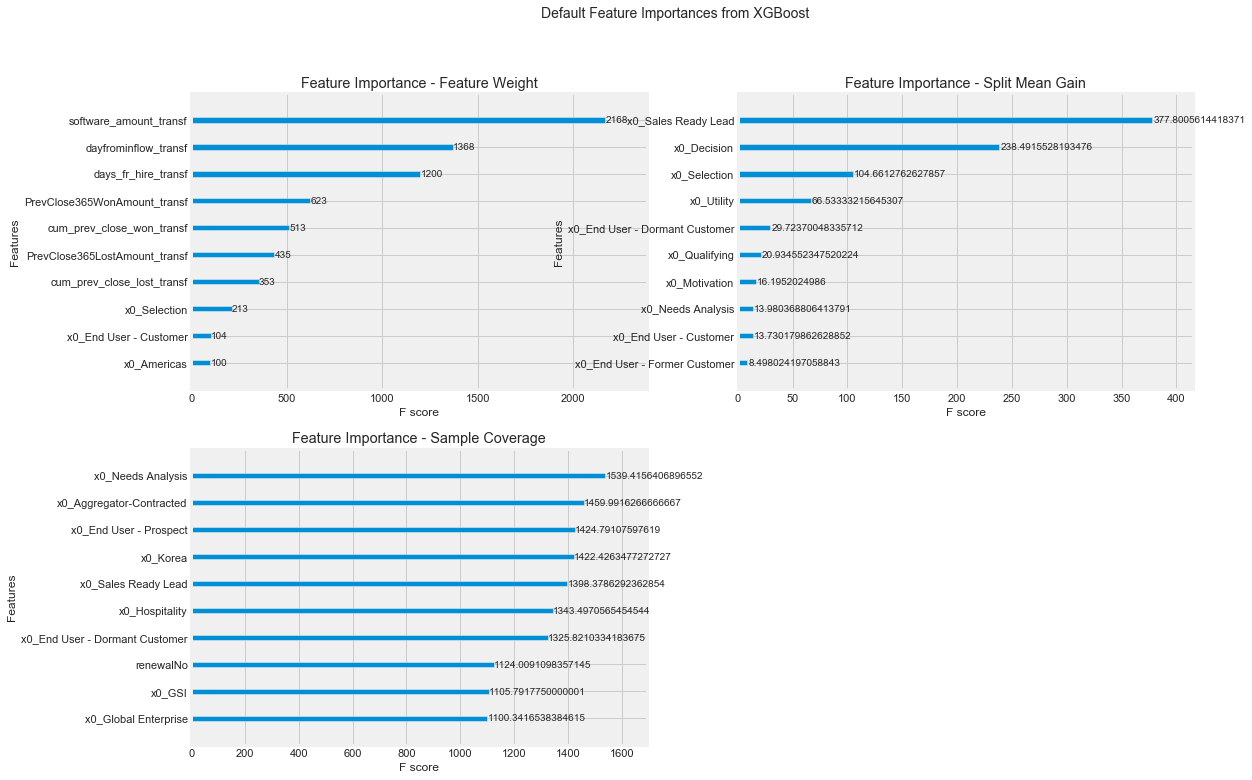

In [189]:
fig = plt.figure(figsize = (16, 12))
title = fig.suptitle("Default Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
xgb.plot_importance(xgc, importance_type='weight', ax=ax1, max_num_features=10)
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2, 2)
xgb.plot_importance(xgc, importance_type='gain', ax=ax2, max_num_features=10)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2, 3)
xgb.plot_importance(xgc, importance_type='cover', ax=ax3, max_num_features=10)
t=ax3.set_title("Feature Importance - Sample Coverage")

# **model Adjusted to not include laststage and customer type**

In [198]:
X_adj = train_features_scaled.loc[:, no_stage_cust_cat].copy()
y_adj = exist_train['wonopp'].values

In [199]:
X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(X_adj, y_adj, test_size = .33)
#X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, random_state=0, train_size=.67)

In [201]:
print("base rate", np.sum(y_train_adj == 1) / len(X_train_adj))

base rate 0.5443370397273286


In [202]:
data2_adj, labels_adj = X_adj, y_adj
labels_adj = np.array([int(label_adj) for label_adj in labels_adj])
data2_adj.shape, labels_adj.shape

((26712, 90), (26712,))

In [203]:
X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(data2_adj, labels_adj, test_size=0.3, random_state=42)
X_train_adj.shape, X_test_adj.shape

((18698, 90), (8014, 90))

In [204]:
data_disp_adj, labels_disp_adj = X_adj, y_adj
X_train_disp_adj, X_test_disp_adj, y_train_disp_adj, y_test_disp_adj = train_test_split(data_disp_adj, labels_disp_adj, test_size=0.3, random_state=42)
X_train_disp_adj.shape, X_test_disp_adj.shape

((18698, 90), (8014, 90))

In [205]:
%%time

xgc_adj = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc_adj.fit(X_train_adj, y_train_adj)

CPU times: user 1min, sys: 123 ms, total: 1min
Wall time: 1min


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [206]:
predictions_adj = xgc_adj.predict(X_test_adj)
predictions_adj[:10]

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [207]:
import model_evaluation_utils as meu
class_labels_adj = list(set(labels_adj))
meu.display_model_performance_metrics(true_labels=y_test_adj, predicted_labels=predictions_adj, classes=class_labels_adj)

Model Performance metrics:
------------------------------
Accuracy: 0.7989
Precision: 0.7985
Recall: 0.7989
F1 Score: 0.7982

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      3583
           1       0.81      0.84      0.82      4431

    accuracy                           0.80      8014
   macro avg       0.80      0.79      0.80      8014
weighted avg       0.80      0.80      0.80      8014


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       2683   900
        1        712  3719


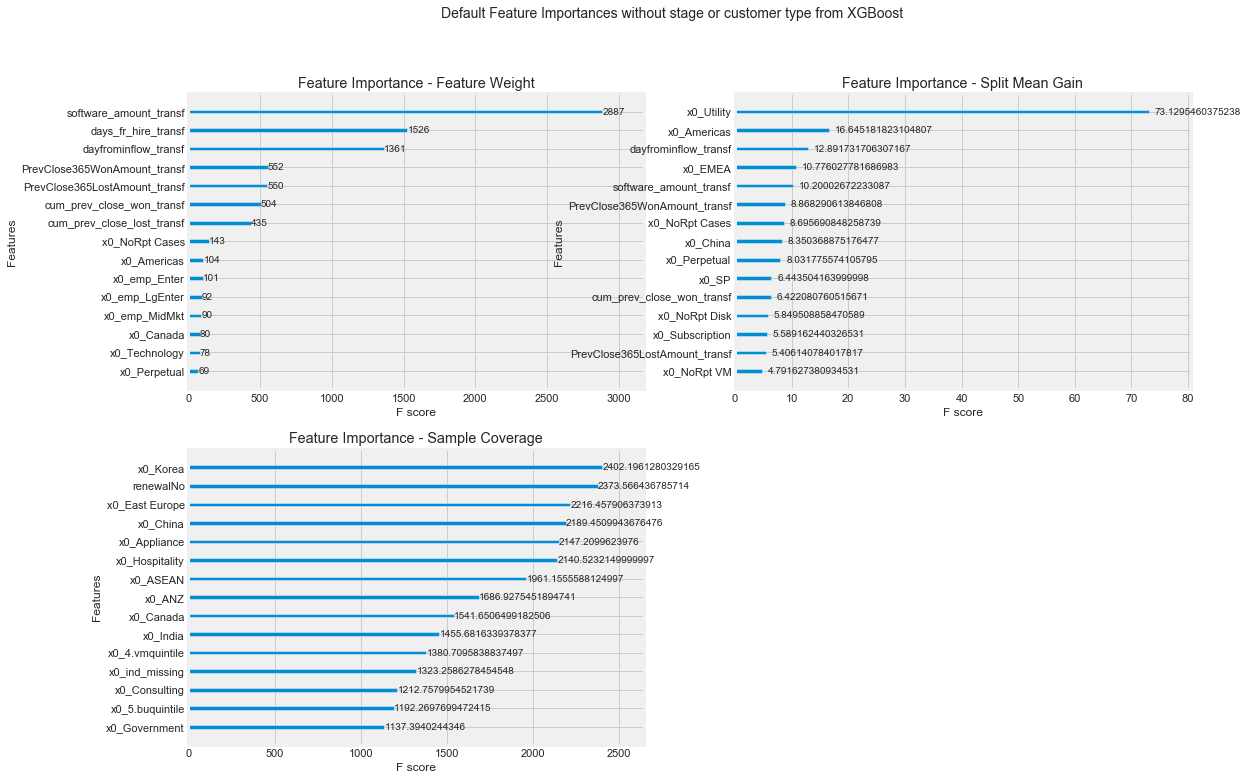

In [209]:
fig = plt.figure(figsize = (16, 12))
title = fig.suptitle("Default Feature Importances without stage or customer type from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
xgb.plot_importance(xgc_adj, importance_type='weight', ax=ax1, max_num_features=15)
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2, 2)
xgb.plot_importance(xgc_adj, importance_type='gain', ax=ax2, max_num_features=15)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2, 3)
xgb.plot_importance(xgc_adj, importance_type='cover', ax=ax3, max_num_features=15)
t=ax3.set_title("Feature Importance - Sample Coverage")

# **Existing Customer Model using Only Qualified Stage**

In [211]:
test_qual = train_features_scaled.loc[train_features_scaled['x0_Qualifying']==1, no_stage_cust_cat].copy()

In [214]:
test_qual.sample(5)

,software_amount_transf,PrevClose365WonAmount_transf,PrevClose365LostAmount_transf,cum_prev_close_lost_transf,cum_prev_close_won_transf,dayfrominflow_transf,days_fr_hire_transf,12mo_tCases,x0_Appliance,x0_Perpetual,x0_SaaS,x0_Subscription,x0_Utility,x0_APAC,x0_Americas,x0_EMEA,x0_GSI,x0_ANZ,x0_ASEAN,x0_Canada,x0_Channel,x0_China,x0_East Europe,x0_Global Enterprise,x0_India,x0_Japan,x0_Korea,x0_Large National,x0_MESAT,x0_North-West Europe,x0_Public Sector,x0_SP,x0_South Europe,x0_Territory,x0_US East,x0_US West & LATAM,x0_Unallocated,x0_Agriculture,x0_Banking & Insurance,x0_Chemicals,x0_Communications,x0_Construction,x0_Consulting,x0_Education,x0_Government,x0_Healthcare,x0_Hospitality,x0_Legal,x0_Manufacturing,x0_Media,x0_Other,x0_Recreation,x0_Technology,x0_Transportation,x0_Utilities,x0_Wholesale & Retail,x0_ind_missing,x0_emp_Enter,x0_emp_LgEnter,x0_emp_MidMkt,x0_emp_SMB,x0_emp_blank,x0_1.vmquintile,x0_2.vmquintile,x0_3.vmquintile,x0_4.vmquintile,x0_5.vmquintile,x0_NoRpt VM,x0_1.buquintile,x0_2.buquintile,x0_3.buquintile,x0_4.buquintile,x0_5.buquintile,x0_NoRpt BU,x0_1.diskquintile,x0_2.diskquintile,x0_3.diskquintile,x0_4.diskquintile,x0_5.diskquintile,x0_NoRpt Disk,x0_1.casequintile,x0_2.casequintile,x0_3.casequintile,x0_4.casequintile,x0_5.casequintile,x0_NoRpt Cases,renewalNo,renewalYes,casesNo,casesYes
12909,-0.16,-0.19,0.74,0.16,-0.33,-0.71,4.11,4.11,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00
2083,-0.33,-0.17,-0.20,-0.40,-0.17,-0.18,-0.28,-0.28,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
16013,-0.22,-0.19,-0.09,0.16,-0.17,-0.56,-0.47,-0.47,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
19682,-0.26,-0.19,-0.20,-0.40,-0.41,-0.61,-0.70,-0.70,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
9980,-0.30,-0.13,-0.20,-0.40,1.04,3.42,1.41,1.41,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


In [219]:
# check that only have qualifying for modeling
print(train_features_scaled.iloc[12909,[20]],train_features_scaled.iloc[2083,[20]],
     train_features_scaled.iloc[16013,[20]],train_features_scaled.iloc[19682,[20]],
     train_features_scaled.iloc[9980,[20]])

x0_Qualifying   1.00
Name: 12909, dtype: float64 x0_Qualifying   1.00
Name: 2083, dtype: float64 x0_Qualifying   1.00
Name: 16013, dtype: float64 x0_Qualifying   1.00
Name: 19682, dtype: float64 x0_Qualifying   1.00
Name: 9980, dtype: float64


In [223]:
X_qual = train_features_scaled.loc[train_features_scaled['x0_Qualifying']==1, no_stage_cust_cat].copy()
y_qual = exist_train['wonopp'].loc[exist_train['laststagename']=='Qualifying'].values

In [224]:
print(len(X_qual))
print(len(y_qual))

5213
5213


In [225]:
X_train_qual, X_test_qual, y_train_qual, y_test_qual = train_test_split(X_qual, y_qual, test_size = .33)

print("base rate", np.sum(y_train_qual == 1) / len(X_train_qual))

base rate 0.12428407789232532


In [226]:
data2_qual, labels_qual = X_qual, y_qual
labels_qual = np.array([int(label_qual) for label_qual in labels_qual])
data2_qual.shape, labels_qual.shape

((5213, 90), (5213,))

In [227]:
X_train_qual, X_test_qual, y_train_qual, y_test_qual = train_test_split(data2_qual, labels_qual, test_size=0.3, random_state=42)
X_train_qual.shape, X_test_qual.shape

((3649, 90), (1564, 90))

In [228]:
data_disp_qual, labels_disp_qual = X_qual, y_qual
X_train_disp_qual, X_test_disp_qual, y_train_disp_qual, y_test_disp_qual = train_test_split(data_disp_qual, labels_disp_qual, test_size=0.3, random_state=42)
X_train_disp_qual.shape, X_test_disp_qual.shape

((3649, 90), (1564, 90))

In [229]:
%%time

xgc_qual = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc_qual.fit(X_train_qual, y_train_qual)

CPU times: user 12.4 s, sys: 29.6 ms, total: 12.5 s
Wall time: 11.9 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [230]:
predictions_qual = xgc_qual.predict(X_test_qual)
predictions_qual[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [231]:
class_labels_qual = list(set(labels_qual))
meu.display_model_performance_metrics(true_labels=y_test_qual, predicted_labels=predictions_qual, classes=class_labels_qual)

Model Performance metrics:
------------------------------
Accuracy: 0.929
Precision: 0.9255
Recall: 0.929
F1 Score: 0.9263

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1350
           1       0.79      0.66      0.72       214

    accuracy                           0.93      1564
   macro avg       0.87      0.82      0.84      1564
weighted avg       0.93      0.93      0.93      1564


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0       1312   38
        1         73  141


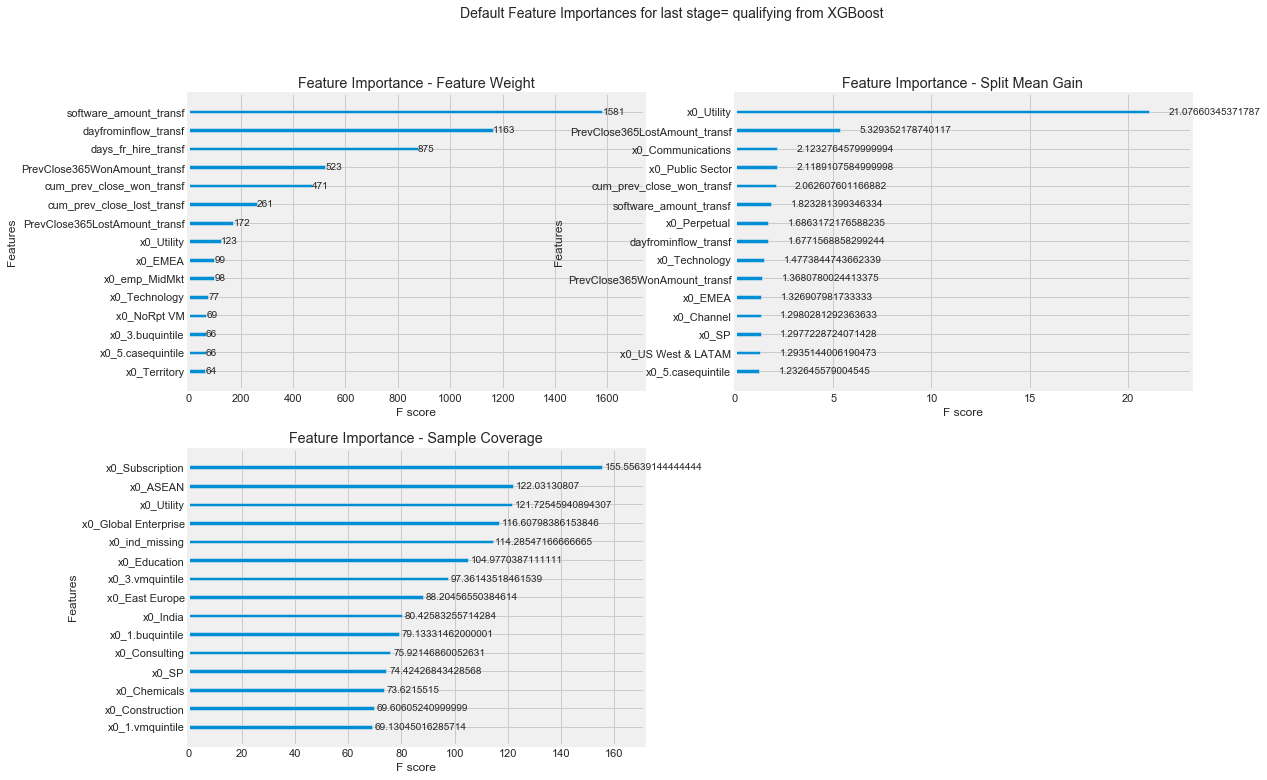

In [232]:
fig = plt.figure(figsize = (16, 12))
title = fig.suptitle("Default Feature Importances for last stage= qualifying from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
xgb.plot_importance(xgc_qual, importance_type='weight', ax=ax1, max_num_features=15)
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2, 2)
xgb.plot_importance(xgc_qual, importance_type='gain', ax=ax2, max_num_features=15)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2, 3)
xgb.plot_importance(xgc_qual, importance_type='cover', ax=ax3, max_num_features=15)
t=ax3.set_title("Feature Importance - Sample Coverage")